# Прогнозирование удоя покупаемых коров

**Описание проекта:**  
Мы работаем в IT-компании, которая выполняет на заказ проекты по машинному обучению. К нам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма». Фермер определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Нам необходимо провести анализ, разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке.

**Цель исследования:**  
Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже.

**Описание данных:**  
    Три датасета:
    1) Cодержит данные о стаде фермера на текущий момент.
    2) Хранит имя папы каждой коровы в стаде фермера.
    3) Данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.

**Ход исследования:**  
    - [1. Загрузка данных](#загрузка)  
    - [2. Предобработка данных](#предобработка)  
    - [3. Исследовательский анализ данных](#исслед)  
    - [4. Корреляционный анализ](#корр)  
    - [5. Обучение модели линейной регрессии](#линеар)  
    - [6. Обучение модели логистической регрессии](#логистик)    
    - [7. Выводы](#вывод)  

**Общий вывод:**   
Обучили три модели линейной регрессии, постепенно добавляя в каждую из них дополнительные параметры. С каждым новым разом точность модели увеличивалась, и для дальнейшего прогноза Удоя выбрали третью модель с точность 82%. С помощью третьей модели спрогнозировали удой коров, которых фермер хочет купить. Все коровы подошли ферверу по удою (более 6000 кг в год)
При помощи логистической регрессии обучили модель по прогнозу молока. Нам важно исключить ошибку первого рода, поэтому нашли тот порог, когда ошибок первого рода нет вовсе. Это 81%. Всё что больше 0.81 - вкусное молоко. Ниже - не вкусное.
Спрогнозировали вкус молока коров, которых фермер собирается купить. И в результате прогноза нашлась всего одна корова, которая вероятнее всего даст более 6000кг в год и это будет вкусное молоко. И 4 коровы, которые очень близки к вкусному молоку.


<a id="загрузка"></a>
# 1. Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   OneHotEncoder
                                  )
from sklearn.linear_model import (LinearRegression, 
                                  LogisticRegression
                                 )

from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             mean_absolute_error, 
                             mean_squared_error,
                             precision_score,
                             recall_score,
                             r2_score
                            )

RANDOM_STATE = 42


In [2]:
try:
    ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep = ';')
except:
    ferma_main = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep = ';')
ferma_main

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
629,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
630,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
631,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
632,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет


In [3]:
try:
    ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep = ';')
except:
    ferma_dad = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep = ';')
ferma_dad

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
...,...,...
624,625,Буйный
625,626,Барин
626,627,Барин
627,628,Барин


In [4]:
try:
    cow_buy = pd.read_csv('/datasets/cow_buy.csv',sep = ';')
except:
    cow_buy = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', sep = ';')
cow_buy

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


In [5]:
def opening (data):
        print('ПЕРВЫЕ 5 СТРОК')
        print(data.head(), '\n')
        
        print('ИНФОРМАЦИЯ О ДАННЫХ')
        data.info()
        print('\n')
        
        print('КОЛИЧЕСТВО ПРОПУЩЕННЫХ ЗНАЧЕНИЙ')
        print(data.isna().sum(), '\n')
        
        print('КОЛИЧЕСТВО ПРОПУЩЕННЫХ ЗНАЧЕНИЙ, %')
        print(data.isna().mean()*100, '\n')

        if not data.select_dtypes(include='number').empty:
            print('ОПИСАНИЕ ЧИСЛОВЫХ ДАННЫХ')
            print(data.describe(include='number'), '\n')
        else:
            print('Числовых столбцов нет', '\n')
        
        print('УНИКАЛЬНЫЕ ЗНАЧЕНИЯ КАТЕГОРИАЛЬНЫХ ДАННЫХ')
        cat_cols = cow_buy.select_dtypes(include=['object', 'category'])
        for col in cat_cols:
            print(f'{col}: {cow_buy[col].nunique()} уникальных значения -  {cow_buy[col].unique()}')
        print('\n')
        
        print('КОЛИЧЕСТВО ДУБЛИКАТОВ')
        print(data.duplicated().sum(), '\n')
        
        print('РАСПРЕДЕЛЕНИЕ ДАННЫХ КОЛИЧЕСТВЕННЫХ СТОЛБЦОВ')
        if not data.select_dtypes(include='number').empty:
            data.select_dtypes(include='number').hist(figsize=(15,10), bins=20)
        else:
            print('Нет числовых колонок для построения гистограмм')

ПЕРВЫЕ 5 СТРОК
   id  Удой, кг ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                  14,2              1743   
1   2      5529                                  12,8              2138   
2   3      5810                                    14              1854   
3   4      5895                                  12,4              2012   
4   5      5302                                  12,8              1675   

  СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0,89   Вис Бик Айдиал    Равнинное   
1                                 0,89   Вис Бик Айдиал    Равнинные   
2                                0,885  РефлешнСоверинг    Холмистое   
3                                0,885  РефлешнСоверинг    Холмистое   
4                                0,885   Вис Бик Айдиал    Равнинные   

  порода папы_быка Жирность,% Белок,% Вкус молока      Возраст  
0           Айдиал       3,58   3,07

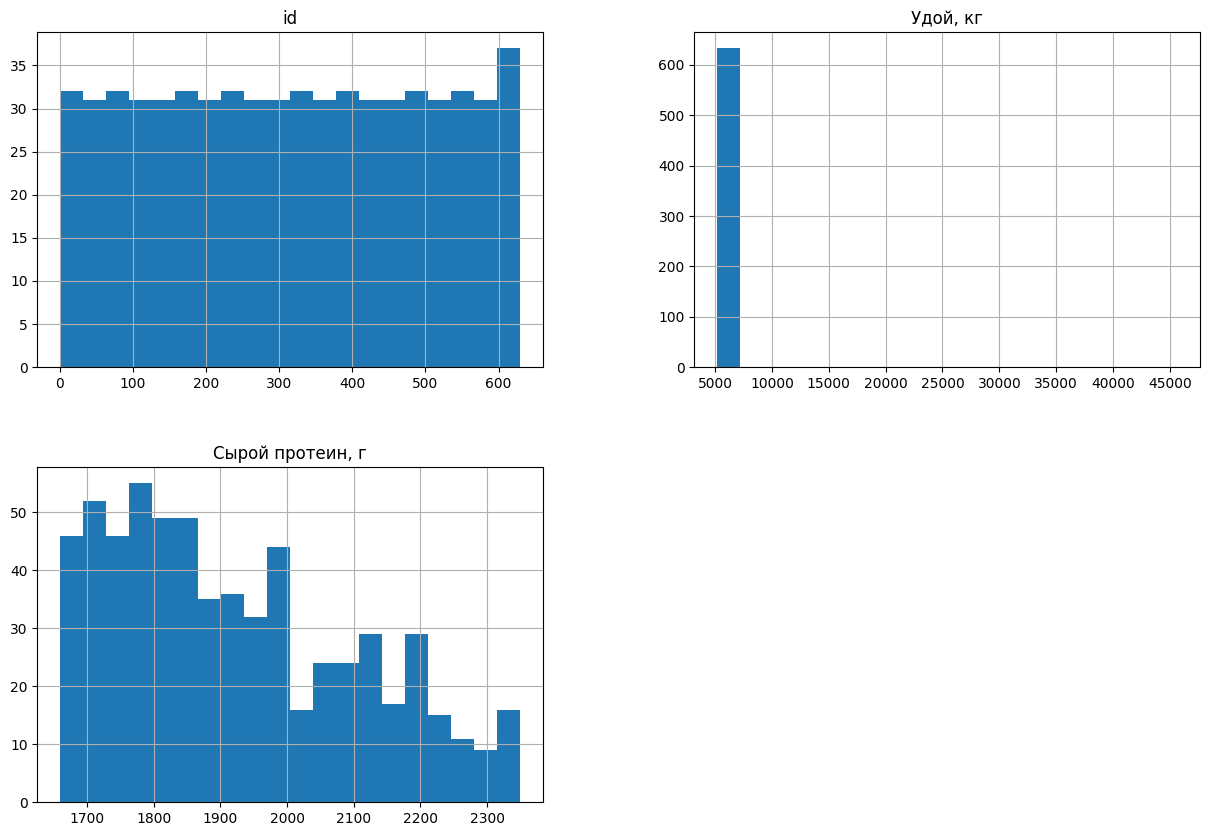

In [6]:
opening(ferma_main)

ПЕРВЫЕ 5 СТРОК
   id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин 

ИНФОРМАЦИЯ О ДАННЫХ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


КОЛИЧЕСТВО ПРОПУЩЕННЫХ ЗНАЧЕНИЙ
id          0
Имя Папы    0
dtype: int64 

КОЛИЧЕСТВО ПРОПУЩЕННЫХ ЗНАЧЕНИЙ, %
id          0.0
Имя Папы    0.0
dtype: float64 

ОПИСАНИЕ ЧИСЛОВЫХ ДАННЫХ
              id
count  629.00000
mean   315.00000
std    181.72094
min      1.00000
25%    158.00000
50%    315.00000
75%    472.00000
max    629.00000 

УНИКАЛЬНЫЕ ЗНАЧЕНИЯ КАТЕГОРИАЛЬНЫХ ДАННЫХ
Порода: 2 уникальных значения -  ['Вис Бик Айдиал' 'РефлешнСоверинг']
Тип пастбища: 2 уникальных значения -  ['холмистое' 'равнинное']
порода папы_быка: 2 уникальных значения - 

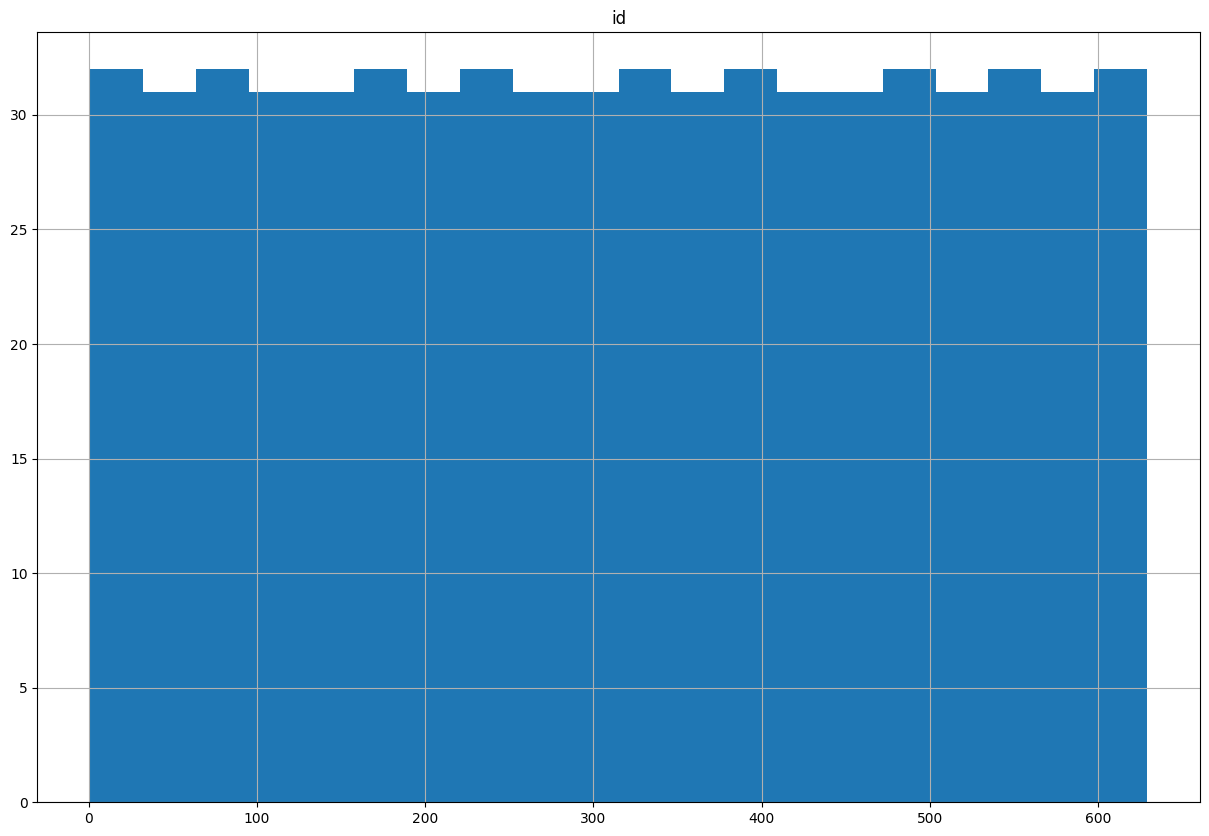

In [7]:
opening(ferma_dad)

In [8]:
opening(cow_buy)

ПЕРВЫЕ 5 СТРОК
            Порода Тип пастбища порода папы_быка  Имя_папы Текущая_жирность,%  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес               3,58   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный               3,54   
2  РефлешнСоверинг    равнинное          Соверин     Барин               3,59   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный                3,4   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный               3,64   

  Текущий_уровень_белок,%      Возраст  
0                   3,076  более_2_лет  
1                   3,081  менее_2_лет  
2                   3,074  более_2_лет  
3                   3,061  более_2_лет  
4                   3,074  более_2_лет   

ИНФОРМАЦИЯ О ДАННЫХ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода           

В данной таблице действительно есть повторяющиеся полностью строки, одна мы не можем утверждать, что это одна и та же корова. Вполне может быть, что это просто очень похожие друг на друга коровы. Так что дубликаты тут оставляем

**Вывод по разделу:**
1) У нас три датасета. В первом (634 строк, 12 столбцов) и втором (629 на 2 столбца) датасете у нас данные о стаде фермера. В третьем датасете (20, 7) данные о коровах, которые фермер рассматривает на покупку.
2) Во всех трёх датасетах нет пропусков.
3) В двух датасетах (1 и 3) есть дубликаты. И судя по концу первого датасета, после удаления дубликатов число строк окажется одинаковым со вторым датасетом.В третьем же датасете мы дубликаты убрать не можем, так как мы не можем утверждать, что это одна и та же корова. Вполне вероятно, что это разные коровы с одинаковыми характеристиками.
4) Видим проблемы с названием колонок. Будем их переводить в удобный вид.Где-то есть разные названия колонок в разных датасетах с одинаковым смыслом.
5) Тип данных в некоторых колонках в 1 и 3 датасете тоже надо посмотреть, заменить object.
6) Значения в самих таблицах нужно заменить, где-то можно их привести к лучшему виду, где-то посмотреть на аномалии.

<a id="предобработка"></a>
##  2.Предобработка данных

Для начала переименуем все колонки в удобный вид, нижний регистр. Удалим из первого датасета дубликаты

In [9]:
ferma_main = ferma_main.rename(columns={
    'Удой, кг': 'milk_kg',
    'ЭКЕ (Энергетическая кормовая единица)': 'feed_unit',
    'Сырой протеин, г': 'protein_g',
    'СПО (Сахаро-протеиновое соотношение)': 'sugar_protein_ratio',
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'father_bull_breed',
    'Жирность,%': 'fat_pct',
    'Белок,%': 'protein_pct',
    'Вкус молока': 'milk_taste',
    'Возраст': 'age'
}).drop_duplicates()
ferma_main

,id,milk_kg,feed_unit,protein_g,sugar_protein_ratio,breed,pasture_type,father_bull_breed,fat_pct,protein_pct,milk_taste,age
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,"15,4",1964,"0,94",РефлешнСоверинг,Равнинное,Айдиал,"3,74","3,075",не вкусно,более_2_лет
625,626,5513,"12,9",1700,"0,88",РефлешнСоверинг,Равнинное,Соверин,"3,64","3,073",вкусно,менее_2_лет
626,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
627,628,5746,"13,8",1994,"0,89",РефлешнСоверинг,Равнинное,Соверин,"3,64","3,077",вкусно,более_2_лет


In [10]:
ferma_dad = ferma_dad.rename(columns={'Имя Папы': 'father_name'})
ferma_dad.head()

,id,father_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [11]:
cow_buy = cow_buy.rename(columns={
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'father_bull_breed',
    'Имя_папы': 'father_name',
    'Текущая_жирность,%': 'fat_pct',
    'Текущий_уровень_белок,%': 'protein_pct',
    'Возраст': 'age'
})
cow_buy.head()

,breed,pasture_type,father_bull_breed,father_name,fat_pct,protein_pct,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


Все колонки с дробными числами переведем в тип данных float. Для этого нам надо во всех строчках поменять запятую на точку. 
Также мы во всех колонках для удобства уберем прописные буквы, заменим на строчные. Все пробелы заменим на нижнее подчеркивание. В некоторых столбцах (pasture_type, father_bull_breed) есть неявные дубликаты или просто ошибки, тоже приведем их к общему виду. А вот столбец id переведем в object. Так как это не какое-числовое значение, это порядковый номер коровы, который нам для расчетов никак не нужен

In [12]:
ferma_main['id'] = ferma_main['id'].astype('object')
ferma_main['feed_unit'] = ferma_main['feed_unit'].str.replace(',', '.').astype('float')
ferma_main['sugar_protein_ratio'] = ferma_main['sugar_protein_ratio'].str.replace(',', '.').astype('float')
ferma_main['breed'] = ferma_main['breed'].str.replace(' ', '_').str.lower()
ferma_main['pasture_type'] = ferma_main['pasture_type'].str.replace('ые', 'ое').str.lower()
ferma_main['father_bull_breed'] = ferma_main['father_bull_breed'].str.replace('лл', 'л').str.lower()
ferma_main['fat_pct'] = ferma_main['fat_pct'].str.replace(',', '.').astype('float')
ferma_main['protein_pct'] = ferma_main['protein_pct'].str.replace(',', '.').astype('float')
ferma_main['milk_taste'] = ferma_main['milk_taste'].str.replace(' ', '_')
ferma_main

,id,milk_kg,feed_unit,protein_g,sugar_protein_ratio,breed,pasture_type,father_bull_breed,fat_pct,protein_pct,milk_taste,age
0,1,5863,14.2,1743,0.890,вис_бик_айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,вис_бик_айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не_вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не_вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,вис_бик_айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,0.940,рефлешнсоверинг,равнинное,айдиал,3.74,3.075,не_вкусно,более_2_лет
625,626,5513,12.9,1700,0.880,рефлешнсоверинг,равнинное,соверин,3.64,3.073,вкусно,менее_2_лет
626,627,5970,14.4,1837,0.880,рефлешнсоверинг,холмистое,соверин,3.64,3.075,не_вкусно,более_2_лет
627,628,5746,13.8,1994,0.890,рефлешнсоверинг,равнинное,соверин,3.64,3.077,вкусно,более_2_лет


In [13]:
ferma_main['milk_kg'].sort_values(ascending=False).head(3)

16     45616
70      7222
135     7207
Name: milk_kg, dtype: int64

В столбце milk_kg в одной из строк есть аномальное значение 45616, скорей всего это ошибка, удалим эту строку полностью

In [14]:
ferma_main = ferma_main[ferma_main['milk_kg'] <= 20000]
ferma_main.reset_index(drop=True, inplace = True)
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   628 non-null    object 
 1   milk_kg              628 non-null    int64  
 2   feed_unit            628 non-null    float64
 3   protein_g            628 non-null    int64  
 4   sugar_protein_ratio  628 non-null    float64
 5   breed                628 non-null    object 
 6   pasture_type         628 non-null    object 
 7   father_bull_breed    628 non-null    object 
 8   fat_pct              628 non-null    float64
 9   protein_pct          628 non-null    float64
 10  milk_taste           628 non-null    object 
 11  age                  628 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 59.0+ KB


присоеденим таблицу ferma_dad по колонке id. 628 строк так и осталось, вместо 12 колонок стало 13. Так же приведем сразу новую колонку father_name к нижнему регистру

In [15]:
ferma = ferma_main.merge(ferma_dad, on = 'id')
ferma['father_name'] = ferma['father_name'].str.lower()
ferma

,id,milk_kg,feed_unit,protein_g,sugar_protein_ratio,breed,pasture_type,father_bull_breed,fat_pct,protein_pct,milk_taste,age,father_name
0,1,5863,14.2,1743,0.890,вис_бик_айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,буйный
1,2,5529,12.8,2138,0.890,вис_бик_айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,соловчик
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не_вкусно,более_2_лет,барин
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не_вкусно,более_2_лет,буйный
4,5,5302,12.8,1675,0.885,вис_бик_айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,барин
...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,625,6812,15.4,1964,0.940,рефлешнсоверинг,равнинное,айдиал,3.74,3.075,не_вкусно,более_2_лет,буйный
624,626,5513,12.9,1700,0.880,рефлешнсоверинг,равнинное,соверин,3.64,3.073,вкусно,менее_2_лет,барин
625,627,5970,14.4,1837,0.880,рефлешнсоверинг,холмистое,соверин,3.64,3.075,не_вкусно,более_2_лет,барин
626,628,5746,13.8,1994,0.890,рефлешнсоверинг,равнинное,соверин,3.64,3.077,вкусно,более_2_лет,барин


Всё то же самое проделываем с датасетом cow_buy, приводим в удобный вид, убираем верхний регистр, меняет на тип данных float

In [16]:
cow_buy['breed'] = cow_buy['breed'].str.replace(' ', '_').str.lower()
cow_buy['father_bull_breed'] = cow_buy['father_bull_breed'].str.lower()
cow_buy['father_name'] = cow_buy['father_name'].str.lower()
cow_buy['fat_pct'] = cow_buy['fat_pct'].str.replace(',', '.').astype('float')
cow_buy['protein_pct'] = cow_buy['protein_pct'].str.replace(',', '.').astype('float')
cow_buy

,breed,pasture_type,father_bull_breed,father_name,fat_pct,protein_pct,age
0,вис_бик_айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет
1,вис_бик_айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет
6,вис_бик_айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет
7,вис_бик_айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет
8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет


**Выводы по разделу:**
1) Были изменены названия колонок в удобный вид во всех таблицах. Убрали верхний регистр, убрали пробелы
2) Убрали в первом датасете дубликаты
3) Присоединили к первому датасету второй по id
4) Так же во всех строках всех датасетов убрали верхние регистры, тоже убрали проблемы, изменили неявные дубликаты
5) все числовые столбцы изменили с типа object на float
6) Убрали одну строку с аномальным значением milk_kg
7) столбец id перевели в object, так как это порядковое число коровы

<a id="исслед"></a>
## 3. Исследовательский анализ данных

In [17]:
ferma.describe()

,milk_kg,feed_unit,protein_g,sugar_protein_ratio,fat_pct,protein_pct
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,6125.968153,14.548726,1923.759554,0.913089,3.604268,3.075670
std,475.857053,1.301777,182.832816,0.032221,0.168093,0.002551
min,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,5749.750000,13.500000,1771.750000,0.890000,3.590000,3.074000
50%,6132.500000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,6501.000000,15.600000,2062.250000,0.940000,3.720000,3.077000
max,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


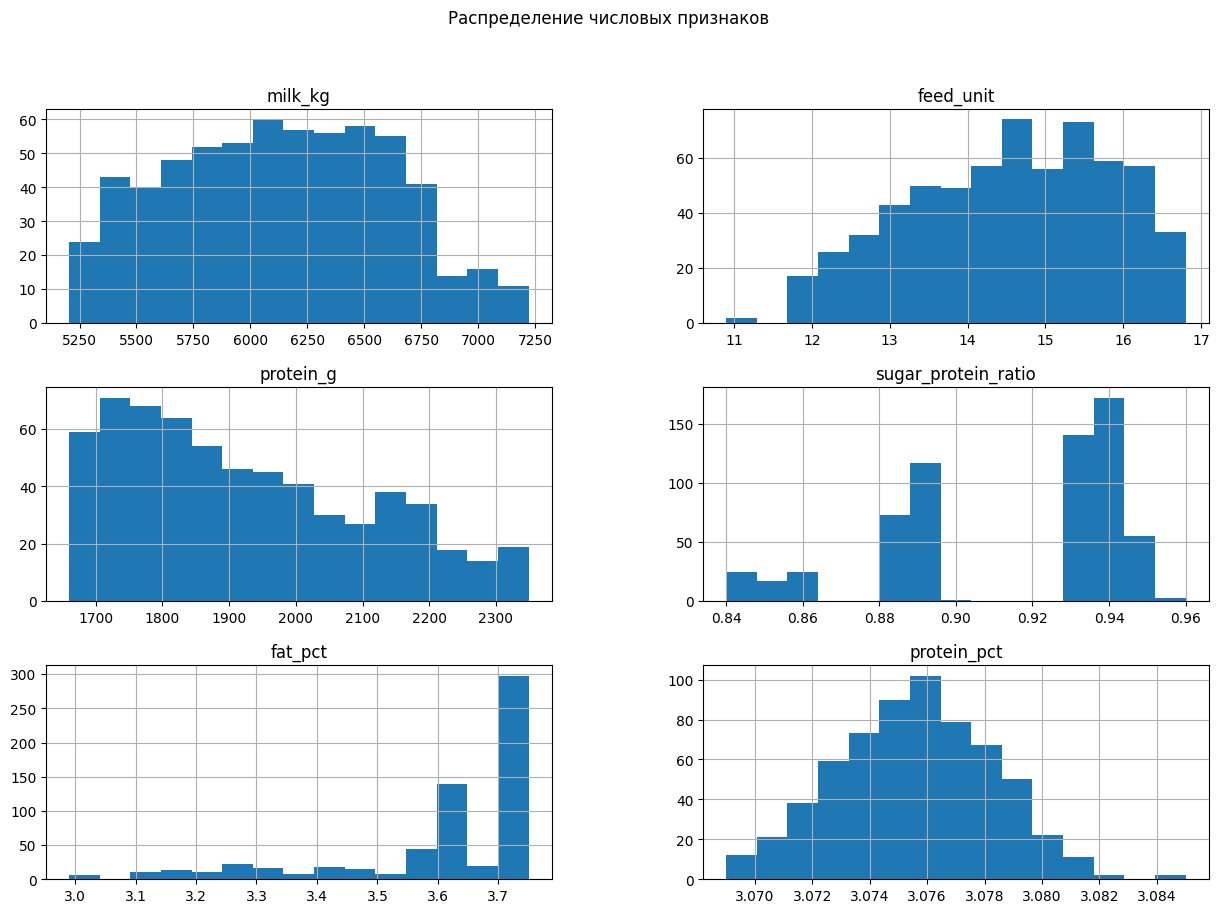

In [18]:
ferma.hist(figsize = (15,10), bins=15)
plt.suptitle('Распределение числовых признаков');

У нас 6 столбцов с количественными признаками. Как мы видим из графиков распределения, столбцы milk_kg, feed_unit и protein_pct нормально распределены. У графика protein_g есть явный пик около 1750, а далее идет по нисходящей. 

В столбцах fat_pct и sugar_protein_ratio мы видим явные пики в определенных значениях. У sugar_protein_ratio есть явные пики в промежутке 0.88-0.90 и 0.93-0.95. А у fat_pct 3.6 и около 3.7

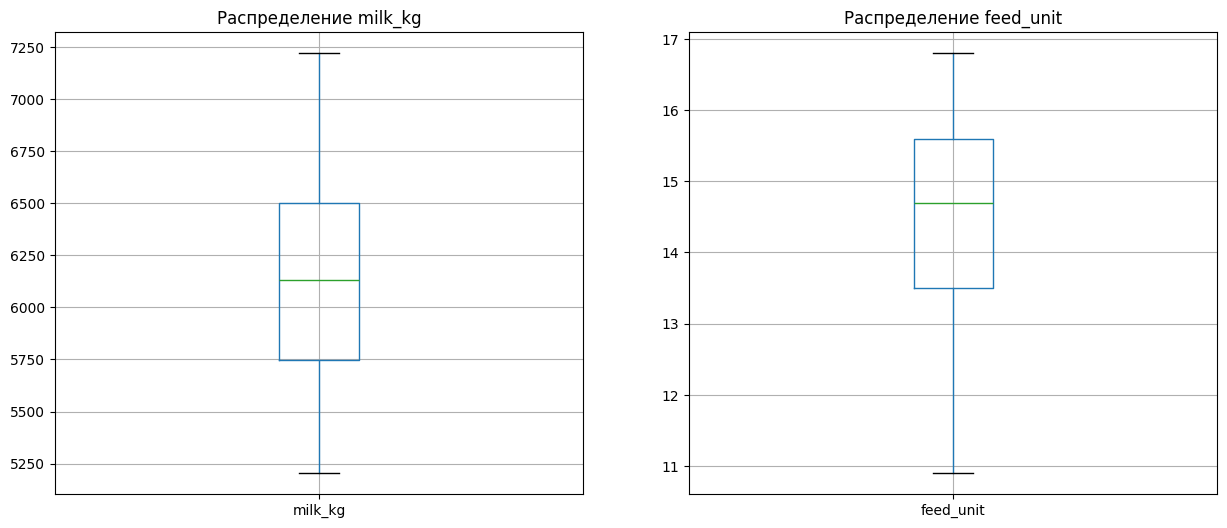

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

ferma.boxplot(column='milk_kg', ax=axes[0])
axes[0].set_title('Распределение milk_kg')

ferma.boxplot(column='feed_unit', ax=axes[1])
axes[1].set_title('Распределение feed_unit');

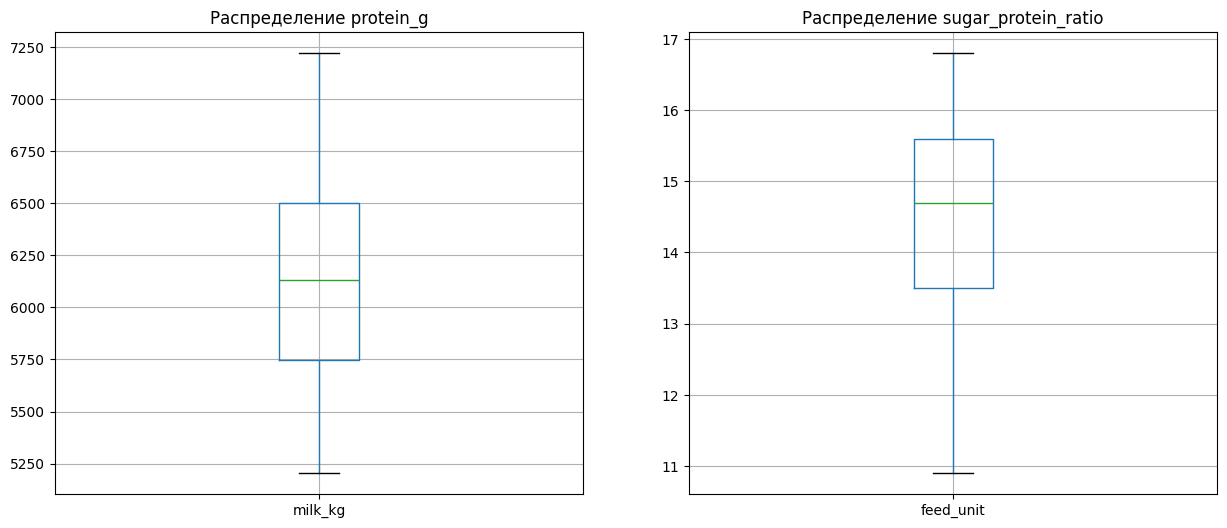

In [20]:
fig1, axes = plt.subplots(1, 2, figsize=(15, 6))

ferma.boxplot(column='milk_kg', ax=axes[0])
axes[0].set_title('Распределение protein_g')

ferma.boxplot(column='feed_unit', ax=axes[1])
axes[1].set_title('Распределение sugar_protein_ratio');

Во всех четырех графиках выше нет выбросов, все значения не покидают пределы "усов"

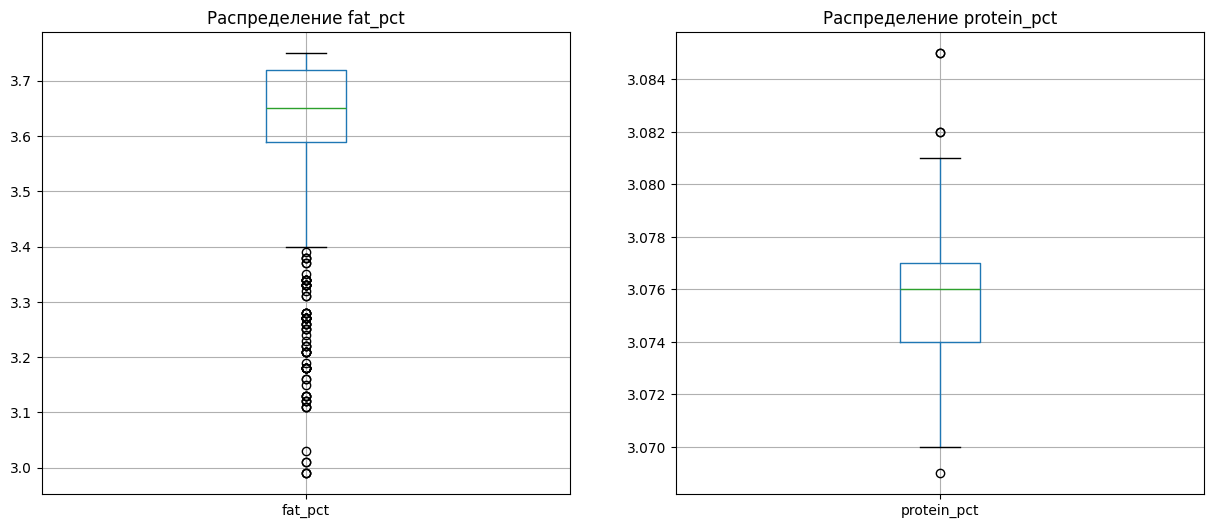

In [21]:
fig2, axes = plt.subplots(1, 2, figsize=(15, 6))

ferma.boxplot(column='fat_pct', ax=axes[0])
axes[0].set_title('Распределение fat_pct')

ferma.boxplot(column='protein_pct', ax=axes[1])
axes[1].set_title('Распределение protein_pct');

А вот тут есть явные выбросы. В случае с % жирности молока много нижних выбросов. В ситуации с процентом протеина выбросов совсем немного, в обе стороны. Но мы оставляем эти данные, так как они сами по себе значения очень близки друг к другу, это не какие-то аномальные значения по своей сути, такой % и правда встречается

In [22]:
ferma.describe(include=['object'])

,id,breed,pasture_type,father_bull_breed,milk_taste,age,father_name
count,628,628,628,628,628,628,628
unique,628,2,2,2,2,2,4
top,1,вис_бик_айдиал,холмистое,айдиал,вкусно,более_2_лет,барин
freq,1,372,350,317,370,518,240


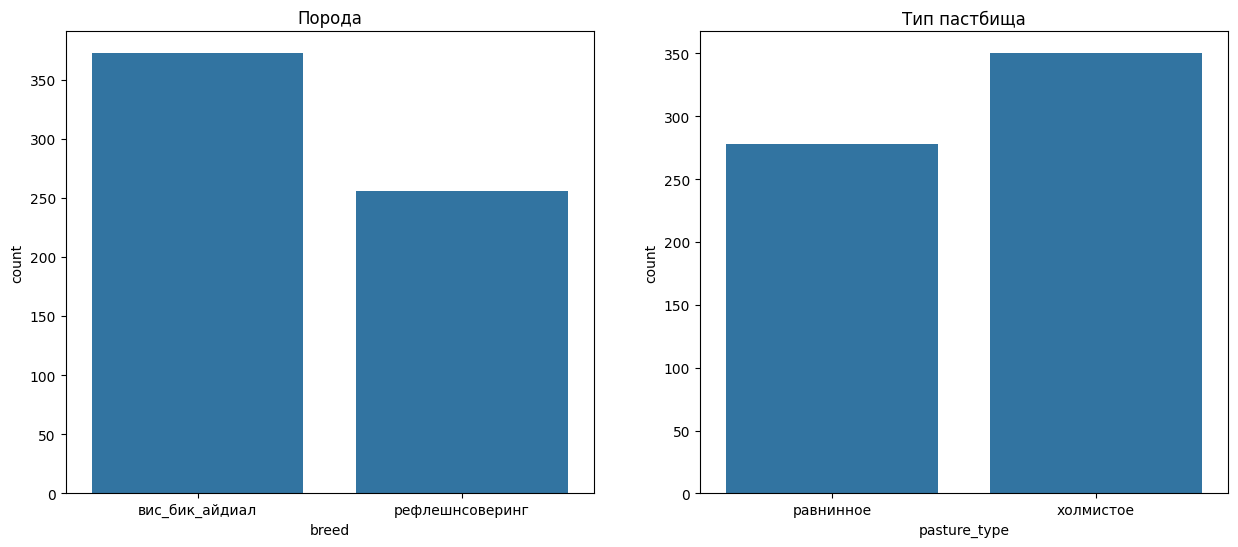

In [23]:
kat, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(data=ferma, x='breed', ax=axes[0])
axes[0].set_title('Порода')

sns.countplot(data=ferma, x='pasture_type', ax=axes[1])
axes[1].set_title('Тип пастбища');

По данным графикам мы видим, что не очень большое различие в количестве коров по породам и по тип пастбищ

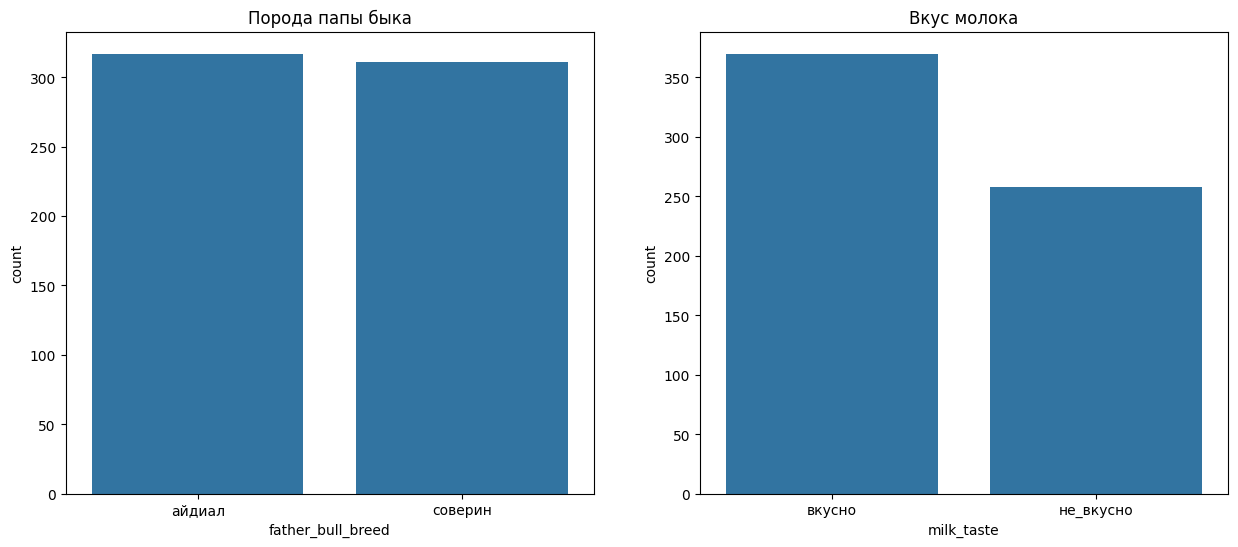

In [24]:
kat1, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(data=ferma, x='father_bull_breed', ax=axes[0])
axes[0].set_title('Порода папы быка')

sns.countplot(data=ferma, x='milk_taste', ax=axes[1])
axes[1].set_title('Вкус молока');

А вот по породе папы быка почти равенство. А вот что касается вкуса молока, то тут явно больше вкусного молока

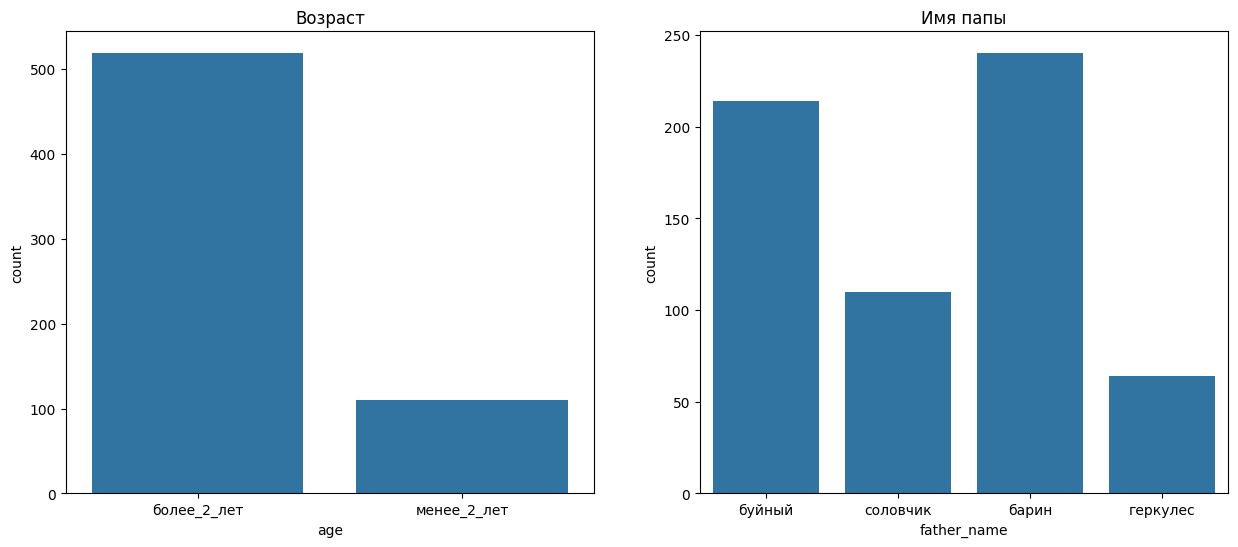

In [25]:
kat2, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(data=ferma, x='age', ax=axes[0])
axes[0].set_title('Возраст')

sns.countplot(data=ferma, x='father_name', ax=axes[1])
axes[1].set_title('Имя папы');

Большинство коров более 2 лет. И преобладают коровы, у которых отец с именем 'Буйный' или 'Барин'

**У нас есть 2 цели:**
1) Найти коров, которые будут давать более 6000 кг удоя в год.
2) Получить вкусное молоко.

Посмотрим, можем ли мы выделить какие-то особенности на данном этапе. Для начала посмотрим соотношение в цифрах по всем коровам в датафрейме

In [26]:
print(round((ferma.groupby('breed')['id'].count() / ferma.shape[0])*100,2))
print('')
print(round((ferma.groupby('pasture_type')['id'].count() / ferma.shape[0])*100, 2))
print('')
print(round((ferma.groupby('father_bull_breed')['id'].count() / ferma.shape[0])*100, 2))
print('')
print(round((ferma.groupby('milk_taste')['id'].count() / ferma.shape[0])*100, 2))
print('')
print(round((ferma.groupby('age')['id'].count() / ferma.shape[0])*100, 2))
print('')
print(round((ferma.groupby('father_name')['id'].count() / ferma.shape[0])*100, 2))

breed
вис_бик_айдиал     59.24
рефлешнсоверинг    40.76
Name: id, dtype: float64

pasture_type
равнинное    44.27
холмистое    55.73
Name: id, dtype: float64

father_bull_breed
айдиал     50.48
соверин    49.52
Name: id, dtype: float64

milk_taste
вкусно       58.92
не_вкусно    41.08
Name: id, dtype: float64

age
более_2_лет    82.48
менее_2_лет    17.52
Name: id, dtype: float64

father_name
барин       38.22
буйный      34.08
геркулес    10.19
соловчик    17.52
Name: id, dtype: float64


А теперь отсортируем по коровам, которые дают более 6000 кг удоя в год

In [27]:
ferma6000 = ferma[ferma['milk_kg'] > 6000]
print(round((ferma6000.groupby('breed')['id'].count() / ferma6000.shape[0])*100,2))
print('')
print(round((ferma6000.groupby('pasture_type')['id'].count() / ferma6000.shape[0])*100, 2))
print('')
print(round((ferma6000.groupby('father_bull_breed')['id'].count() / ferma6000.shape[0])*100, 2))
print('')
print(round((ferma6000.groupby('milk_taste')['id'].count() / ferma6000.shape[0])*100, 2))
print('')
print(round((ferma6000.groupby('age')['id'].count() / ferma6000.shape[0])*100, 2))
print('')
print(round((ferma6000.groupby('father_name')['id'].count() / ferma6000.shape[0])*100, 2))

breed
вис_бик_айдиал     57.3
рефлешнсоверинг    42.7
Name: id, dtype: float64

pasture_type
равнинное    40.0
холмистое    60.0
Name: id, dtype: float64

father_bull_breed
айдиал     61.89
соверин    38.11
Name: id, dtype: float64

milk_taste
вкусно       62.16
не_вкусно    37.84
Name: id, dtype: float64

age
более_2_лет    99.73
менее_2_лет     0.27
Name: id, dtype: float64

father_name
барин       27.03
буйный      44.32
геркулес    12.43
соловчик    16.22
Name: id, dtype: float64


**Проценты, которые прилично изменились для коров, дающих >6000кг молока в год:**
1) Стало больше коров, которые пасутся на холмистой местности.
2) Стало сильно больше коров, у которых порода папы быка - айдиал.
3) Вкус молока улучшился.
4) Коровы, которым меньше 2 лет, почти никогда не дают больше 6000кг молока в год.
5) В общем количестве коров, чей отец 'Барин', больше. А вот коров, которые способны давать >6000 больше от отца 'Буйный'.

In [28]:
ferma_tasty = ferma[ferma['milk_taste'] == 'вкусно']
print(round((ferma_tasty.groupby('breed')['id'].count() / ferma_tasty.shape[0])*100,2))
print('')
print(round((ferma_tasty.groupby('pasture_type')['id'].count() / ferma_tasty.shape[0])*100, 2))
print('')
print(round((ferma_tasty.groupby('father_bull_breed')['id'].count() / ferma_tasty.shape[0])*100, 2))
print('')
print(round((ferma_tasty.groupby('age')['id'].count() / ferma_tasty.shape[0])*100, 2))
print('')
print(round((ferma_tasty.groupby('father_name')['id'].count() / ferma_tasty.shape[0])*100, 2))

breed
вис_бик_айдиал     58.92
рефлешнсоверинг    41.08
Name: id, dtype: float64

pasture_type
равнинное    36.76
холмистое    63.24
Name: id, dtype: float64

father_bull_breed
айдиал     50.54
соверин    49.46
Name: id, dtype: float64

age
более_2_лет    86.22
менее_2_лет    13.78
Name: id, dtype: float64

father_name
барин       40.27
буйный      34.32
геркулес     9.46
соловчик    15.95
Name: id, dtype: float64


**Проценты, которые изменились для коров, которые дают вкусное молоко (сравниваем с датасетом ferma):**
- Сильно больше коров дают вкусное молоко, которые пасутся на холмистой местности

В остальном проценты не сильно отличаются от первоначального датасета

In [29]:
ferma_tasty6000 = ferma_tasty.query('milk_kg > 6000')
print(round((ferma_tasty6000.groupby('breed')['id'].count() / ferma_tasty6000.shape[0])*100,2))
print('')
print(round((ferma_tasty6000.groupby('pasture_type')['id'].count() / ferma_tasty6000.shape[0])*100, 2))
print('')
print(round((ferma_tasty6000.groupby('father_bull_breed')['id'].count() / ferma_tasty6000.shape[0])*100, 2))
print('')
print(round((ferma_tasty6000.groupby('age')['id'].count() / ferma_tasty6000.shape[0])*100, 2))
print('')
print(round((ferma_tasty6000.groupby('father_name')['id'].count() / ferma_tasty6000.shape[0])*100, 2))

breed
вис_бик_айдиал     56.96
рефлешнсоверинг    43.04
Name: id, dtype: float64

pasture_type
равнинное    34.35
холмистое    65.65
Name: id, dtype: float64

father_bull_breed
айдиал     60.0
соверин    40.0
Name: id, dtype: float64

age
более_2_лет    100.0
Name: id, dtype: float64

father_name
барин       31.74
буйный      43.48
геркулес    11.30
соловчик    13.48
Name: id, dtype: float64


И посмотрим на оба условия в действии, когда > 6000кг УДОЙ и молоко вкусное. Вырисовывается рисунок успешной коровы

**Выводы по разделу:**
1) Был изучен первый датасет на распределение количественных признаков. Так же на наличие выбросов в датасете
2) Посмотрели на категориальные признаки, общее количество их в каждом из столбцов, соотношение их друг к другу
3) Были изучены коровы по двум признакам (удой должен быть не меньше 6000 кг и молоко должно быть вкусное). Сравнили соотношение со стартовым датасетом, как меняются характеристики коров при выполнении этих условий
4) Корова, которая ближе всего соответствует обоим условиям - Корова породы вис_бик_айдиал, питается на холмах, папа породы айдиал, а зовут его Буйный. И корова старше 2 лет

<a id="корр"></a>
## 4.Корреляционный анализ

По условию необходимо брать датасет ferma_main, но у меня уже готов, приведен к удобному виду он же с названием ferma. Для дальнейшей работы переведем все категориальные признаки в числовые значения. В breed, pasture_type, father_bull_breed, milk_taste, age у нас по 2 значения. Тут будет числовые 0 и 1

In [30]:
ferma

,id,milk_kg,feed_unit,protein_g,sugar_protein_ratio,breed,pasture_type,father_bull_breed,fat_pct,protein_pct,milk_taste,age,father_name
0,1,5863,14.2,1743,0.890,вис_бик_айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,буйный
1,2,5529,12.8,2138,0.890,вис_бик_айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,соловчик
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не_вкусно,более_2_лет,барин
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не_вкусно,более_2_лет,буйный
4,5,5302,12.8,1675,0.885,вис_бик_айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,барин
...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,625,6812,15.4,1964,0.940,рефлешнсоверинг,равнинное,айдиал,3.74,3.075,не_вкусно,более_2_лет,буйный
624,626,5513,12.9,1700,0.880,рефлешнсоверинг,равнинное,соверин,3.64,3.073,вкусно,менее_2_лет,барин
625,627,5970,14.4,1837,0.880,рефлешнсоверинг,холмистое,соверин,3.64,3.075,не_вкусно,более_2_лет,барин
626,628,5746,13.8,1994,0.890,рефлешнсоверинг,равнинное,соверин,3.64,3.077,вкусно,более_2_лет,барин


In [31]:
ferma['breed_int'] = (ferma['breed'] == 'вис_бик_айдиал').astype('int')
ferma['pasture_type_int'] = (ferma['pasture_type'] == 'холмистое').astype('int')
ferma['father_bull_breed_int'] = (ferma['father_bull_breed'] == 'айдиал').astype('int')
ferma['milk_taste_int'] = (ferma['milk_taste'] == 'вкусно').astype('int')
ferma['age_int'] = (ferma['age'] == 'более_2_лет').astype('int')
ferma['father_name_int'] = pd.factorize(ferma['father_name'])[0]

In [32]:
ferma.head()

,id,milk_kg,feed_unit,protein_g,sugar_protein_ratio,breed,pasture_type,father_bull_breed,fat_pct,protein_pct,milk_taste,age,father_name,breed_int,pasture_type_int,father_bull_breed_int,milk_taste_int,age_int,father_name_int
0,1,5863,14.2,1743,0.890,вис_бик_айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,буйный,1,0,1,1,1,0
1,2,5529,12.8,2138,0.890,вис_бик_айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,соловчик,1,0,0,1,0,1
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не_вкусно,более_2_лет,барин,0,1,0,0,1,2
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не_вкусно,более_2_лет,буйный,0,1,1,0,1,0
4,5,5302,12.8,1675,0.885,вис_бик_айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,барин,1,0,0,1,0,2


**Итого в новых колонках у нас значения:\
breed_int: 1 - вис_бик_айдиал, 0 - рефлешнсоверинг\
pasture_type_int: 1 - равнинное, 0 - холмистое\
father_bull_breed_int: 1 - айдиал, 0 - соверин\
milk_taste_int: 1 - вкусно, 0 - не_вкусно\
age_int: 1 - более_2_лет, 0 - менее_2_лет\
father_name_int: 3 - геркулес, 2 - барин, 1 - соловчик, 0 - буйный**

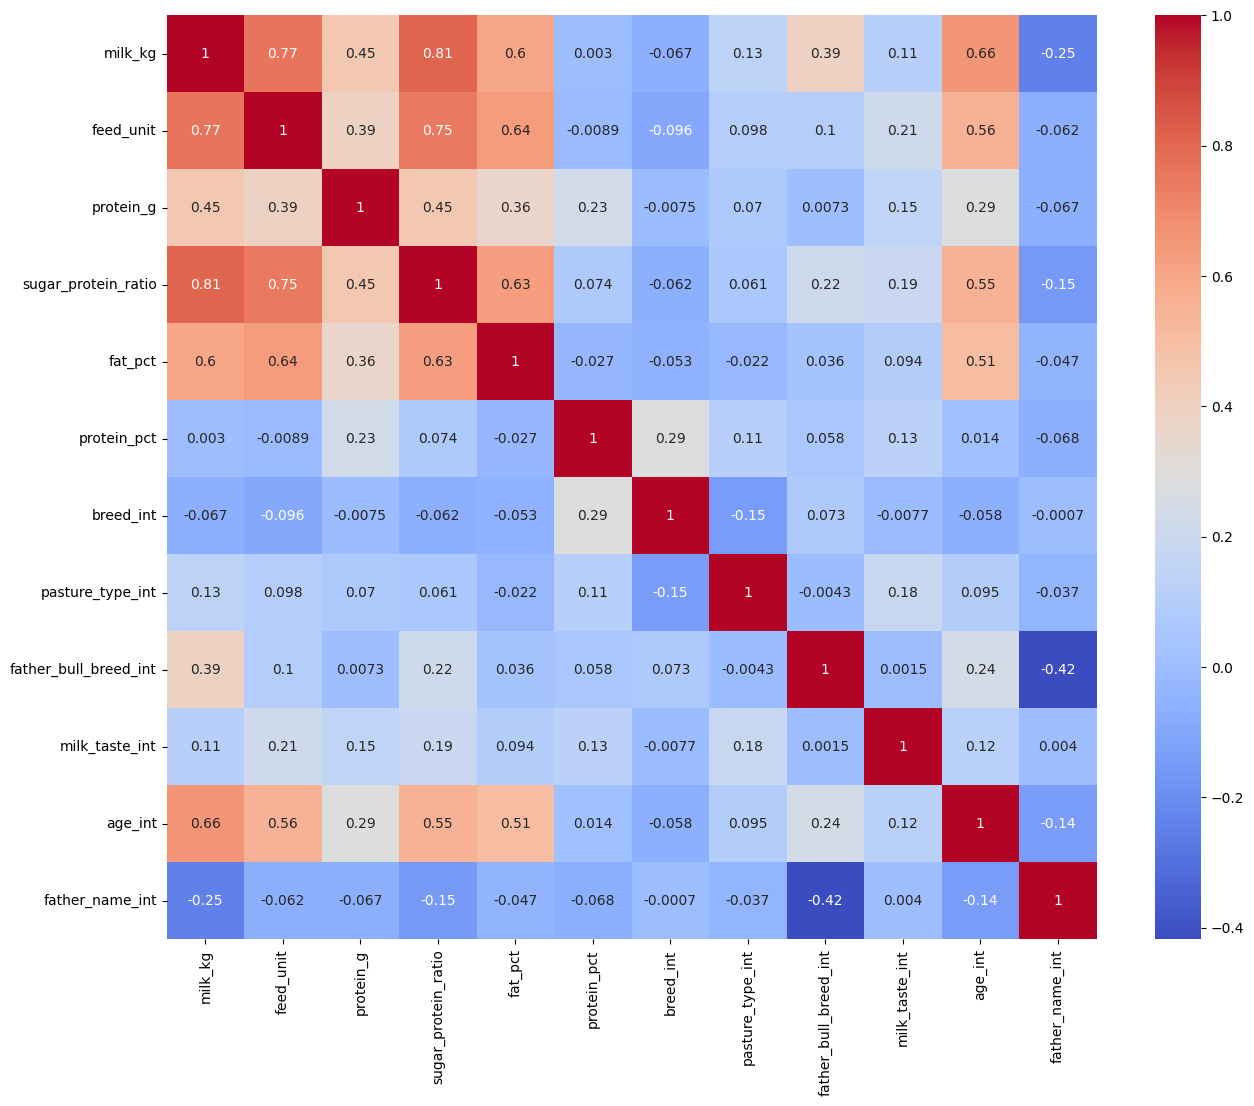

In [33]:
ferma_corr = ferma.select_dtypes(include='number').corr()

plt.figure(figsize=(15,12))
sns.heatmap(ferma_corr, annot=True, cmap='coolwarm');

In [34]:
ferma_corr['milk_kg'].sort_values(ascending=False)

milk_kg                  1.000000
sugar_protein_ratio      0.806339
feed_unit                0.765098
age_int                  0.660707
fat_pct                  0.600902
protein_g                0.446731
father_bull_breed_int    0.392671
pasture_type_int         0.130608
milk_taste_int           0.112839
protein_pct              0.002966
breed_int               -0.067342
father_name_int         -0.245386
Name: milk_kg, dtype: float64

Чтобы выделить признаки, линейно с таргетом не связанные, посмотрим на корреляцию (и на матрицу) milk_kg. Не связанные линейно с таргетом будут считаться те признаки, которые ближе всего к нулю. По модулю до 0.1. Тут это два признака - это breed (порода) и protein_pct (% Белка молока) 
Мультиколлениарностью же считается, когда корреляция между входными признаками по модулю стремится к 1. Как мы видим из матрицы, ближе всего к этому значению входные признаки feed_unit и sugar_protein_ratio. Но это значение не такое высокое (0.75) чтобы мы назвали это мультиколлениарностью и отбросили один из признаков для дальнейшего МО

In [35]:
def sc_plot(a,b):
    plt.figure(figsize=(15, 10))
    sns.scatterplot(data=ferma, x='milk_kg', y=a, hue=b)
    plt.xlabel('Удой, кг')
    return sc_plot

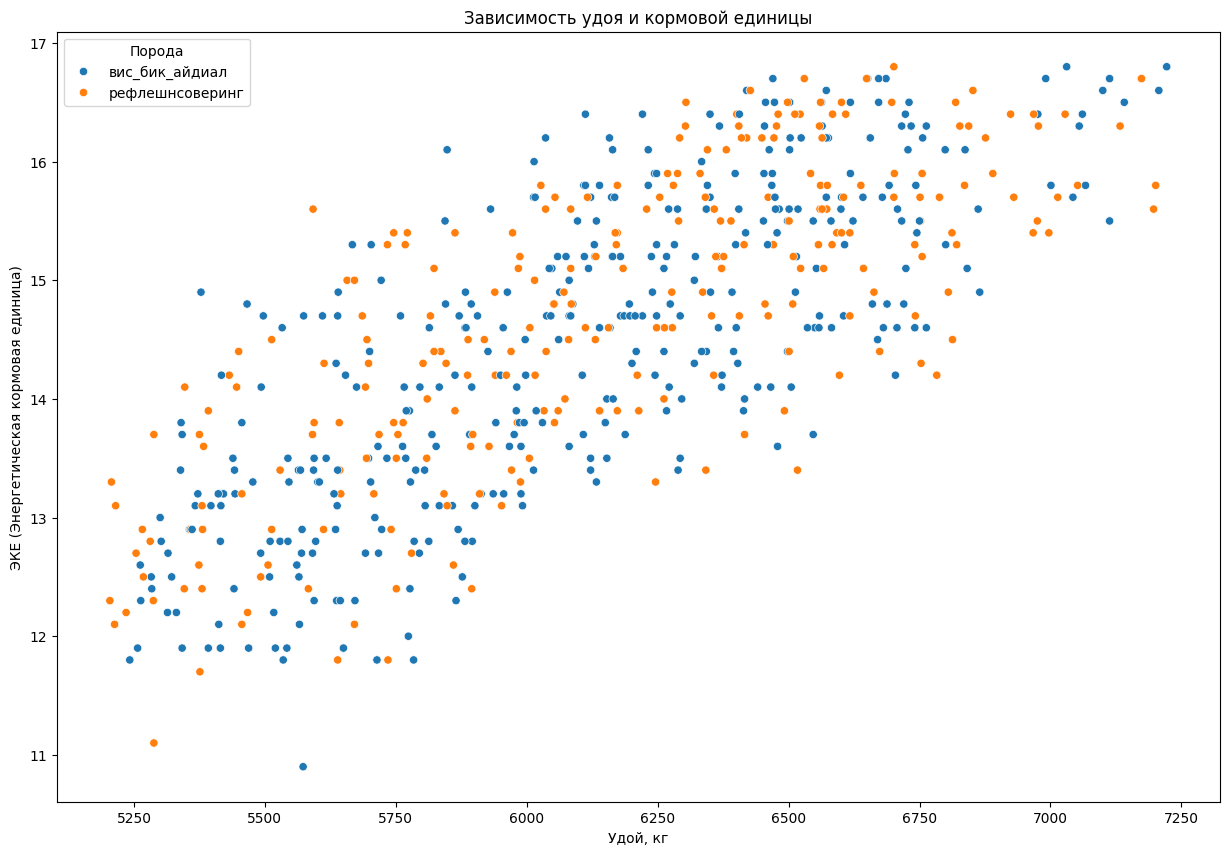

In [36]:
sc_plot('feed_unit', 'breed')
plt.title('Зависимость удоя и кормовой единицы')
plt.legend(title='Порода')
plt.ylabel('ЭКЕ (Энергетическая кормовая единица)');

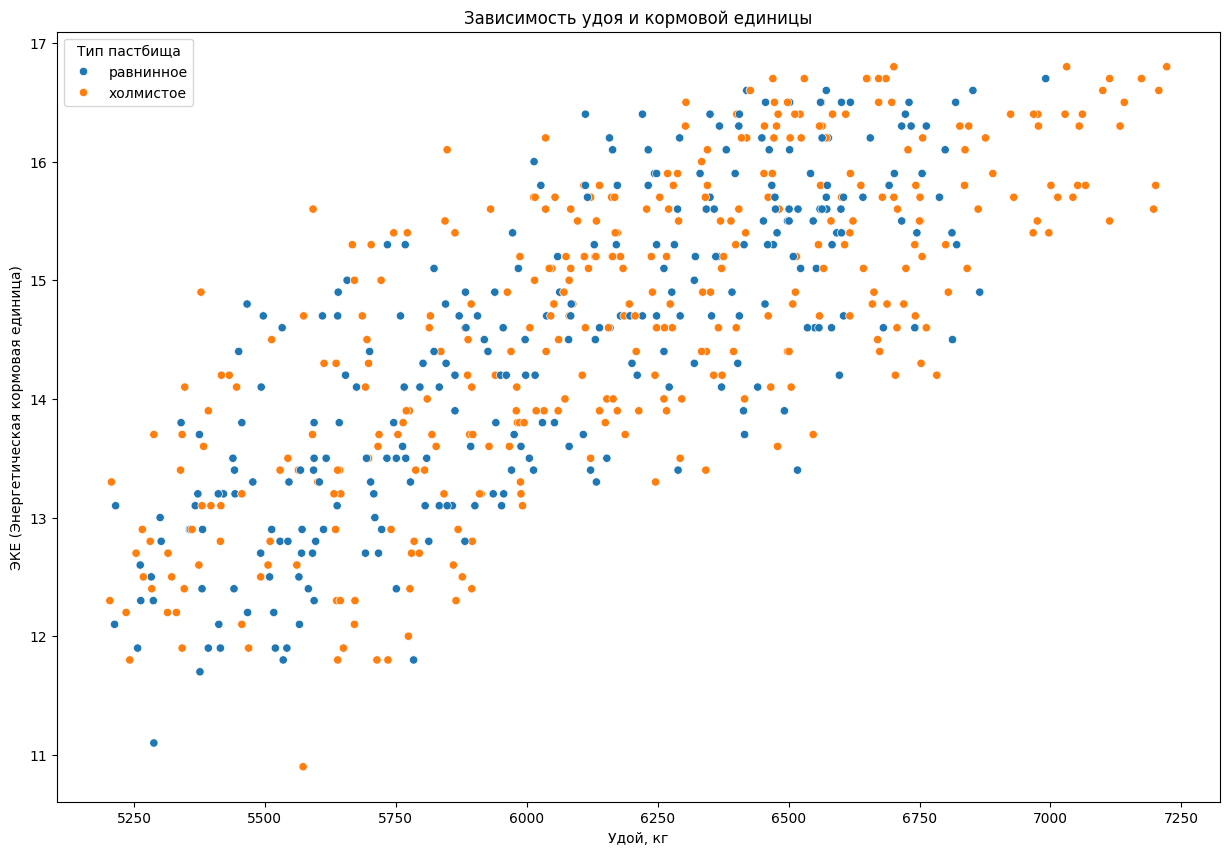

In [37]:
sc_plot('feed_unit', 'pasture_type')
plt.title('Зависимость удоя и кормовой единицы')
plt.legend(title='Тип пастбища')
plt.ylabel('ЭКЕ (Энергетическая кормовая единица)');

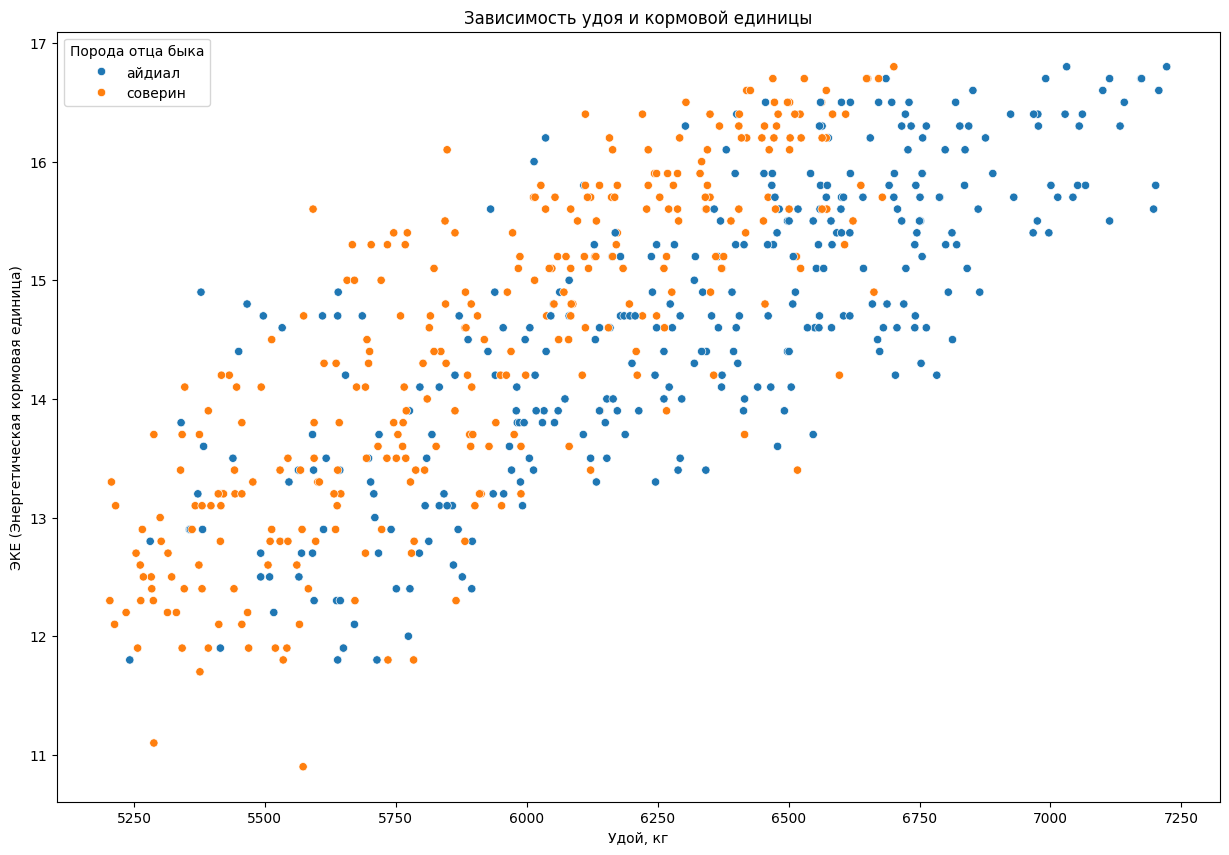

In [38]:
sc_plot('feed_unit', 'father_bull_breed')
plt.title('Зависимость удоя и кормовой единицы')
plt.legend(title='Порода отца быка')
plt.ylabel('ЭКЕ (Энергетическая кормовая единица)');

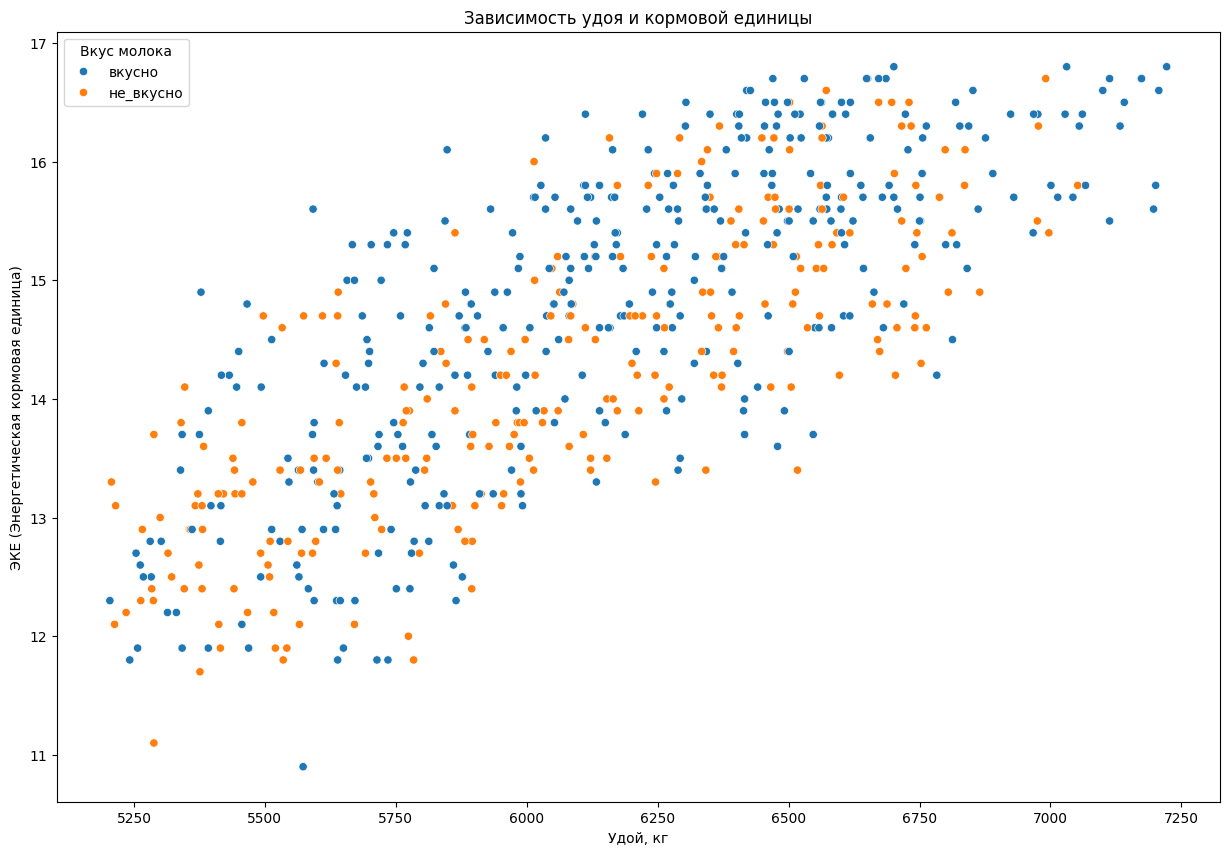

In [39]:
sc_plot('feed_unit', 'milk_taste')
plt.title('Зависимость удоя и кормовой единицы')
plt.legend(title='Вкус молока')
plt.ylabel('ЭКЕ (Энергетическая кормовая единица)');

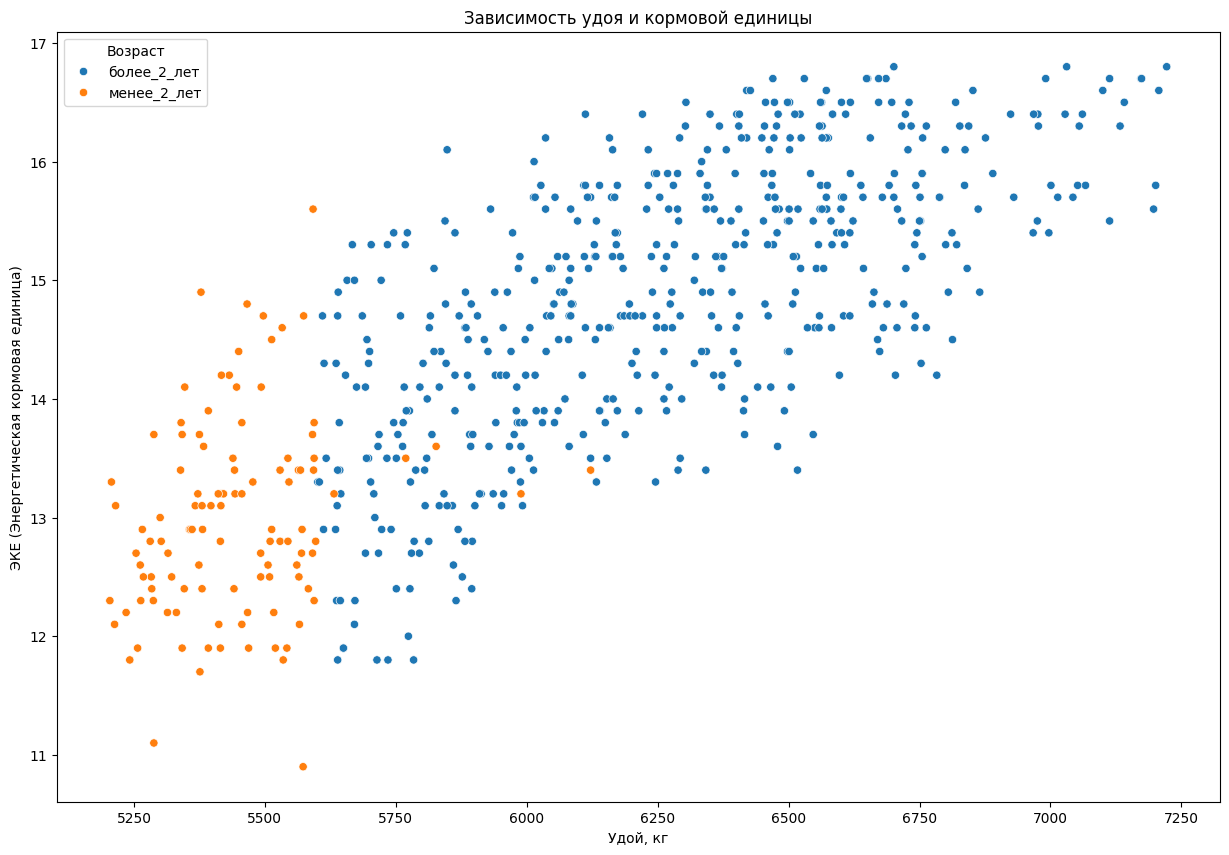

In [40]:
sc_plot('feed_unit', 'age')
plt.title('Зависимость удоя и кормовой единицы')
plt.legend(title='Возраст')
plt.ylabel('ЭКЕ (Энергетическая кормовая единица)');

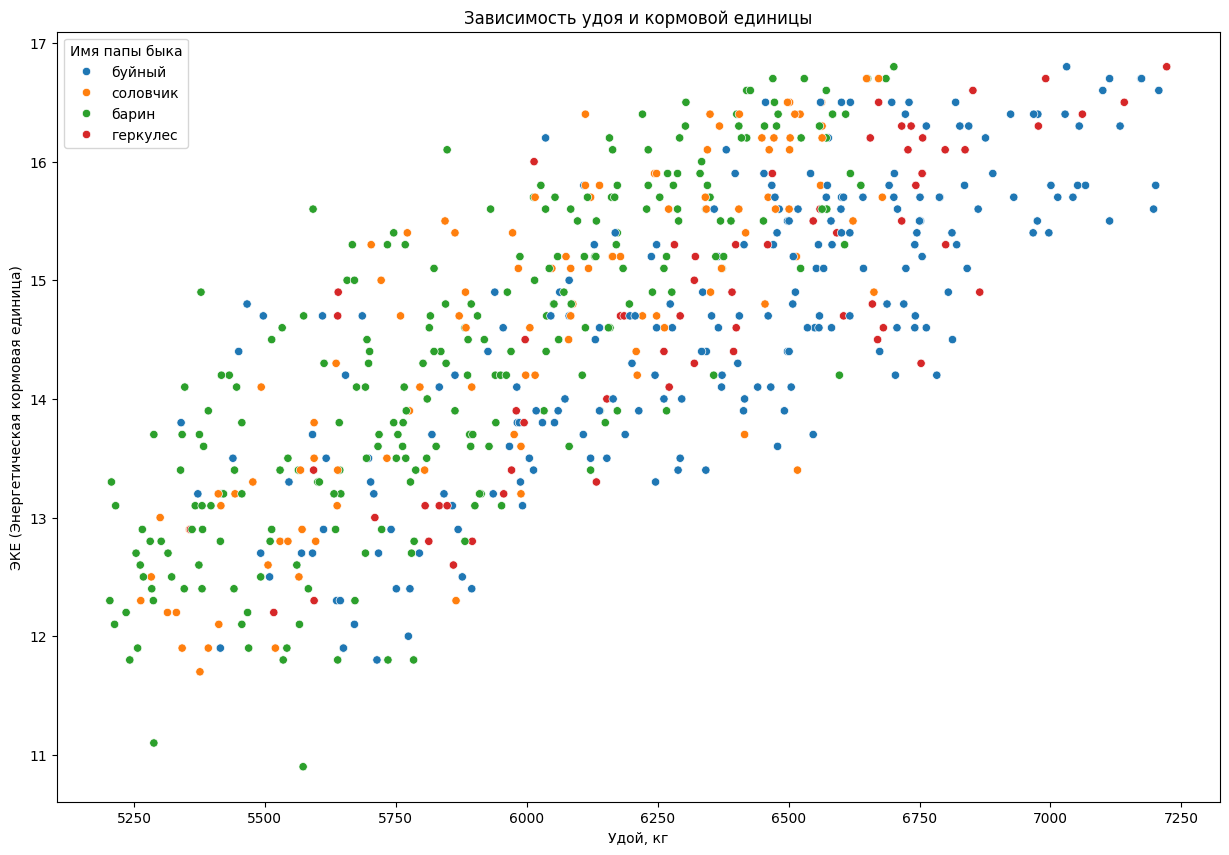

In [41]:
sc_plot('feed_unit', 'father_name')
plt.title('Зависимость удоя и кормовой единицы')
plt.legend(title='Имя папы быка')
plt.ylabel('ЭКЕ (Энергетическая кормовая единица)');

Смотря на графики по зависимости удоя от ЭКЕ можно сказать, что зависимости прямая, линейная и положительная. Из категориальных признаков явно выделяется возраст коровы - те, что старще двух лет, находятся правее. Их удой выше, чем у молодых коров.
Чуть слабее, но всё же заметно преимущество коров, у которых порода папы быка Айдиал. А так же коров, у которых папа бык Буйный

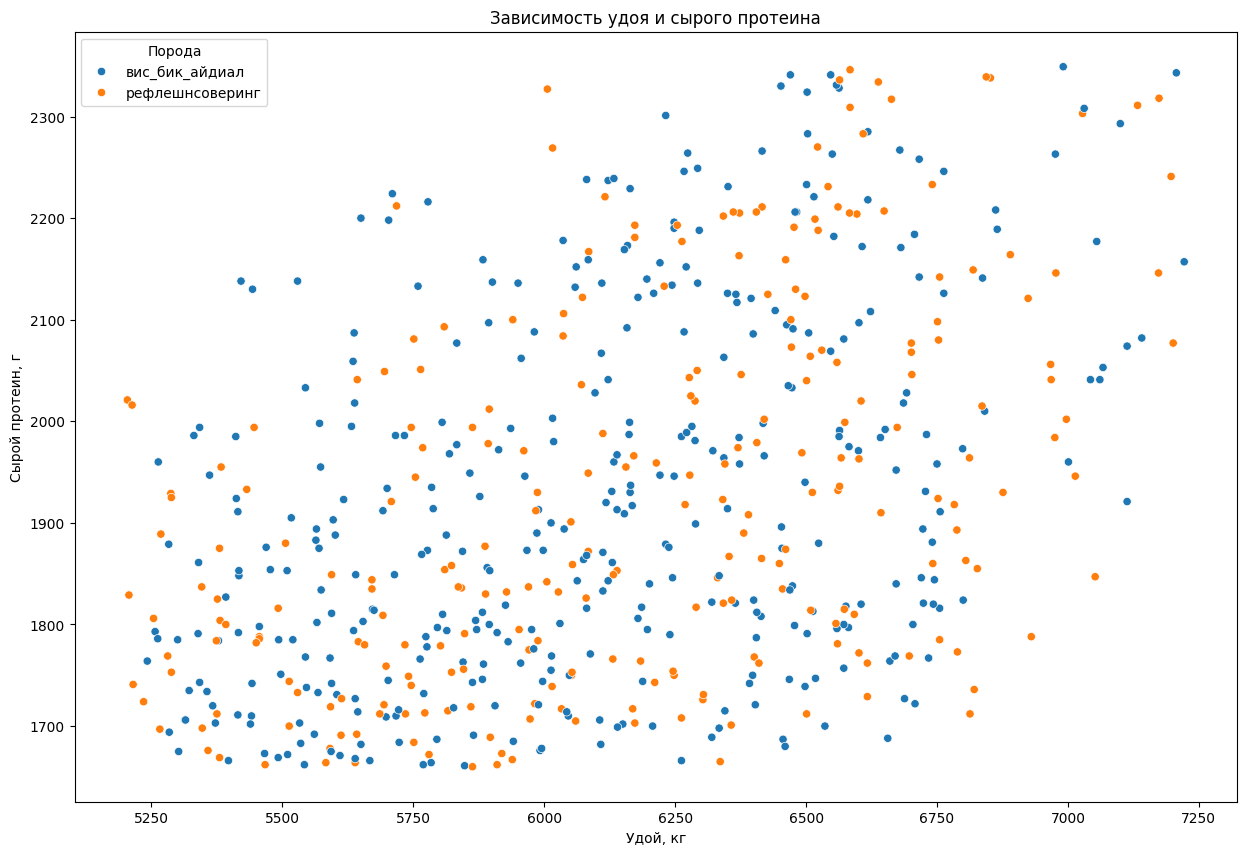

In [42]:
sc_plot('protein_g', 'breed')
plt.title('Зависимость удоя и сырого протеина')
plt.ylabel('Сырой протеин, г')
plt.legend(title='Порода');

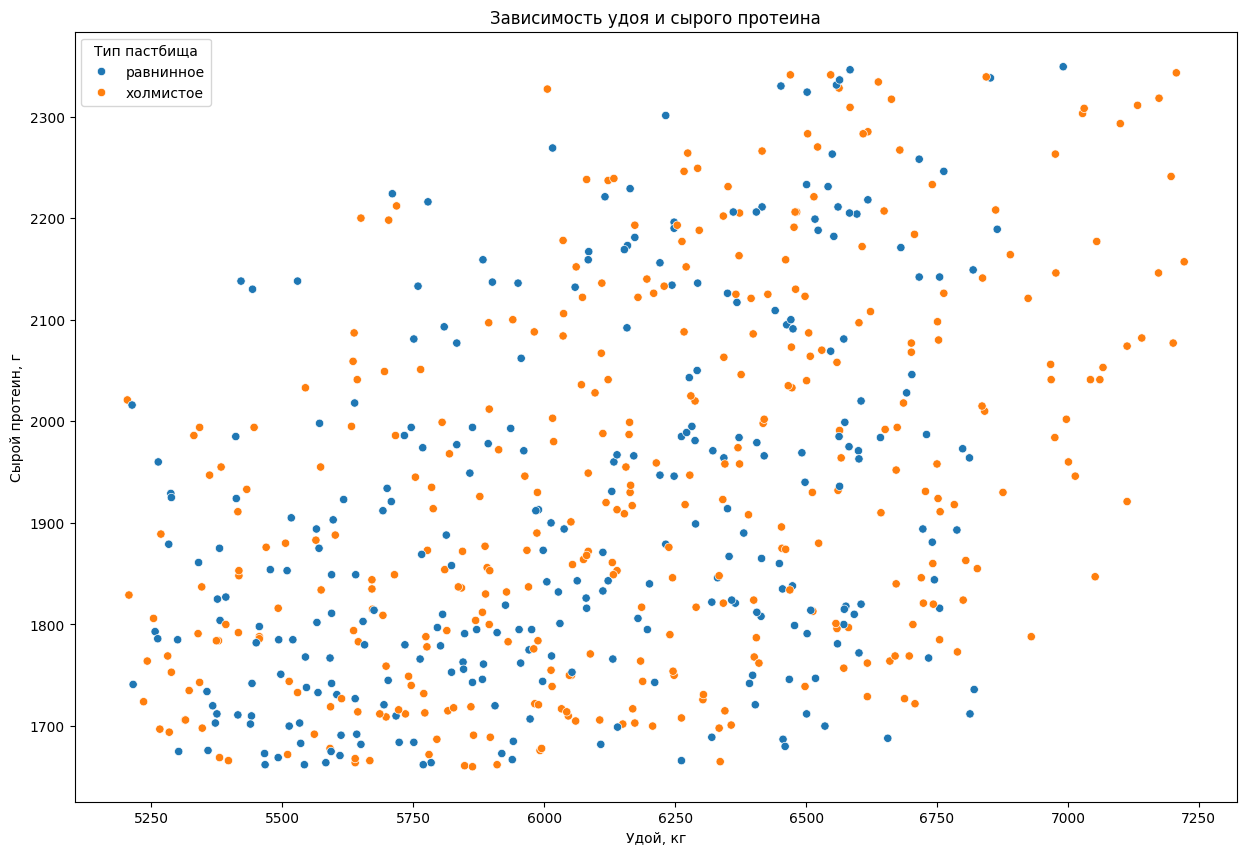

In [43]:
sc_plot('protein_g', 'pasture_type')
plt.title('Зависимость удоя и сырого протеина')
plt.ylabel('Сырой протеин, г')
plt.legend(title='Тип пастбища');

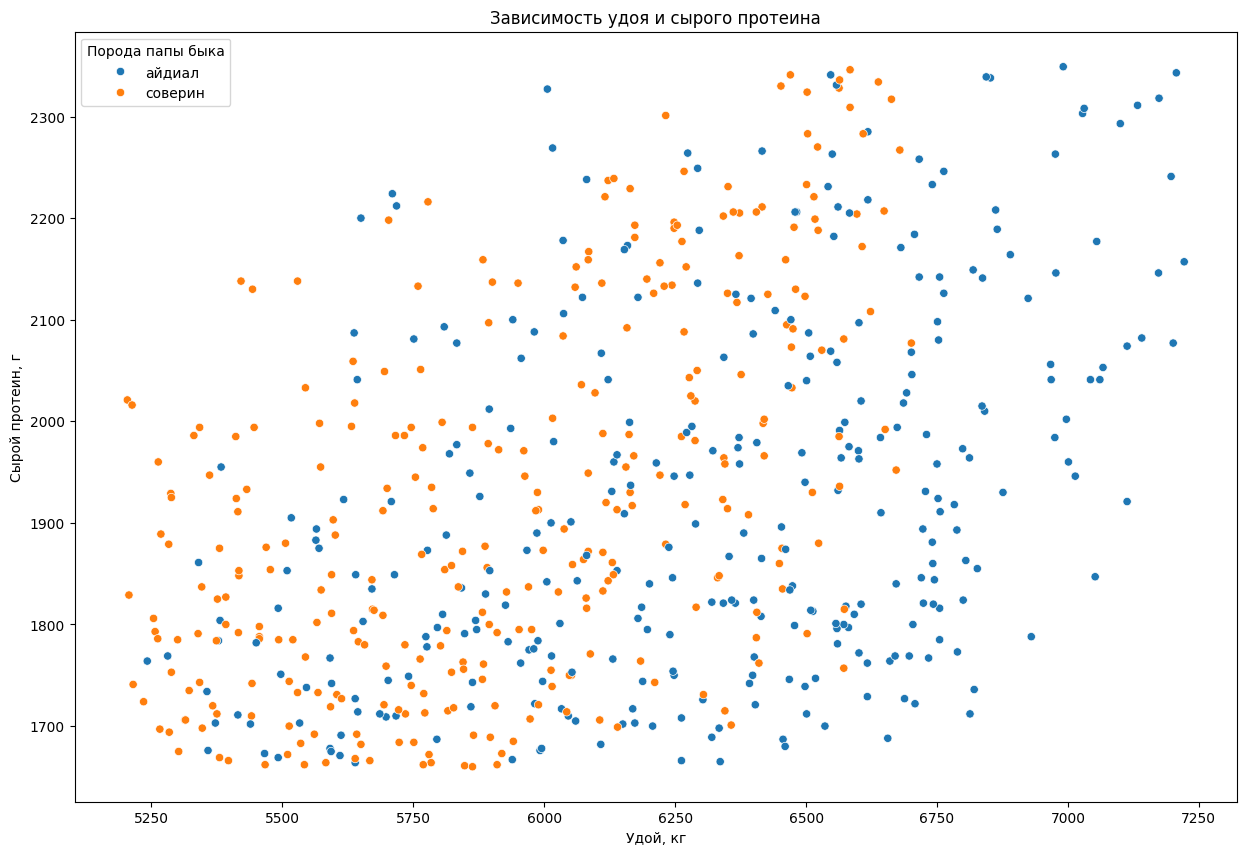

In [44]:
sc_plot('protein_g', 'father_bull_breed')
plt.title('Зависимость удоя и сырого протеина')
plt.ylabel('Сырой протеин, г')
plt.legend(title='Порода папы быка');

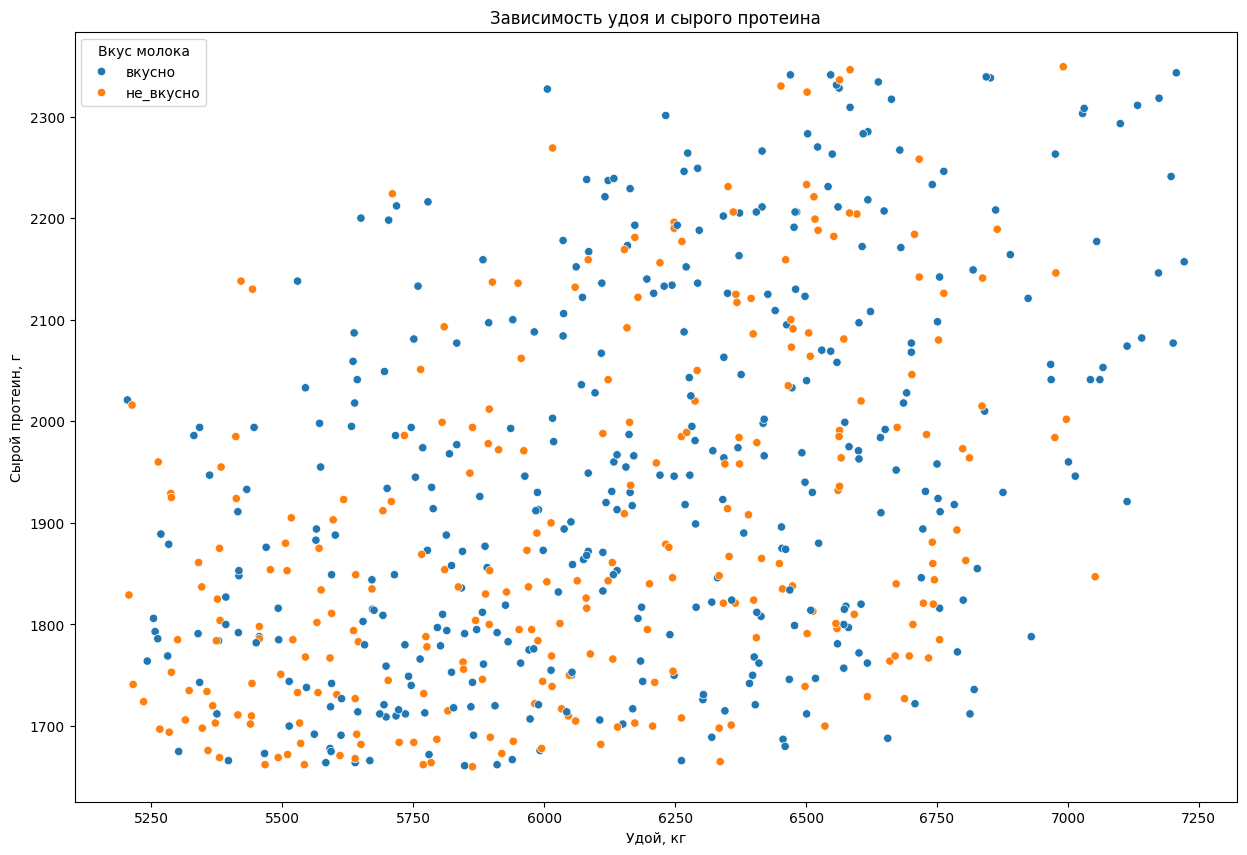

In [45]:
sc_plot('protein_g', 'milk_taste')
plt.title('Зависимость удоя и сырого протеина')
plt.ylabel('Сырой протеин, г')
plt.legend(title='Вкус молока');

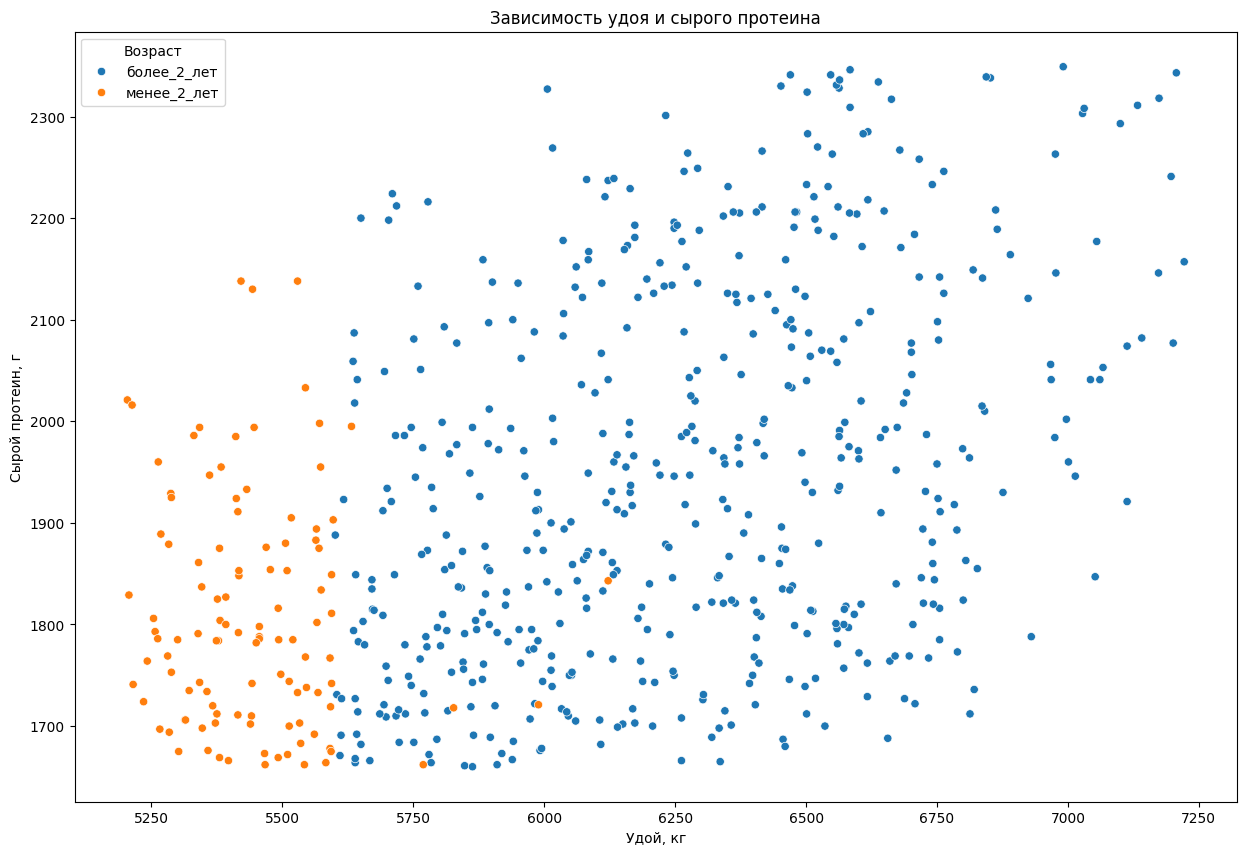

In [46]:
sc_plot('protein_g', 'age')
plt.title('Зависимость удоя и сырого протеина')
plt.ylabel('Сырой протеин, г')
plt.legend(title='Возраст');

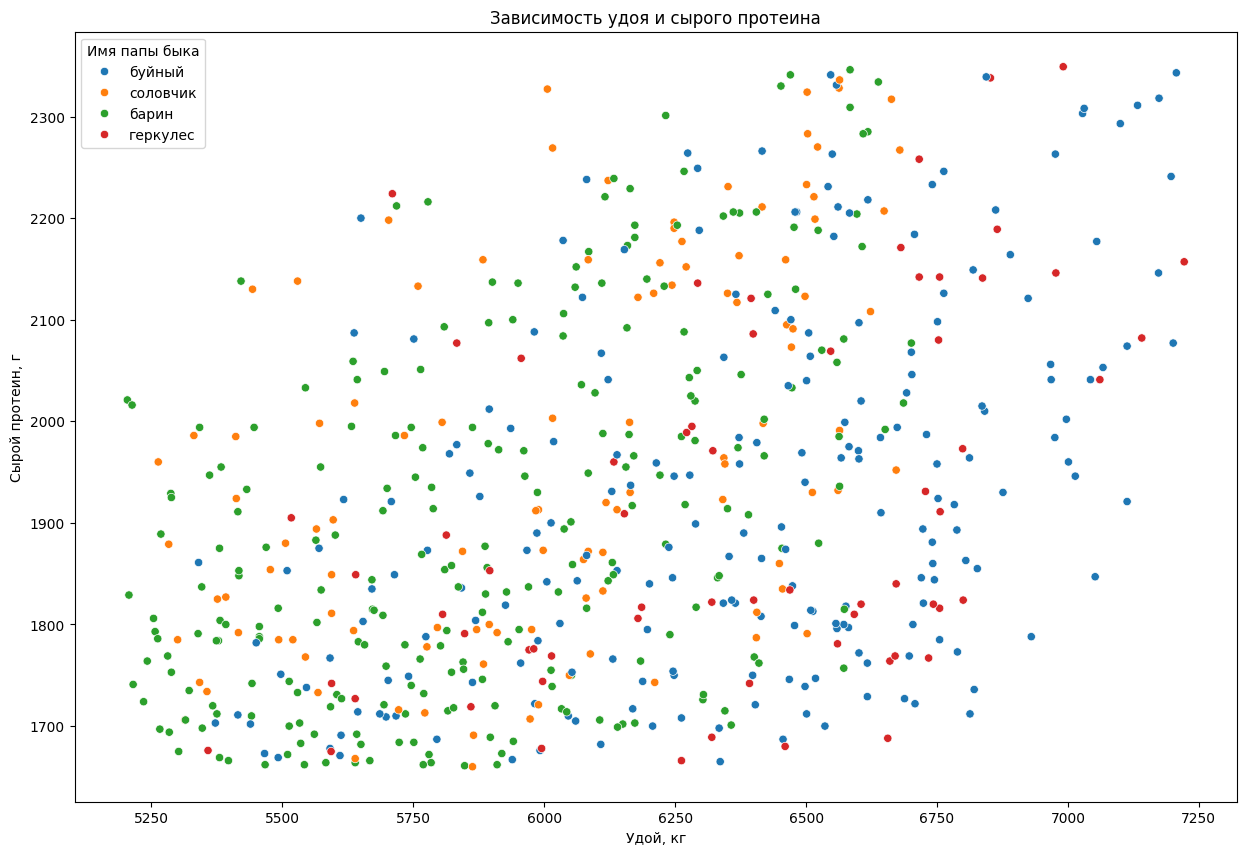

In [47]:
sc_plot('protein_g', 'father_name')
plt.title('Зависимость удоя и сырого протеина')
plt.ylabel('Сырой протеин, г')
plt.legend(title='Имя папы быка');

По графикам зависимости удоя и сырого протеина не видна так сильно зависимость, точки находятся на графике чуть хаотичней. Но все есть преобладание точек от нижнего левого угла к правому верхнему. Из категориальных признаков можно отметить сильную разницу в коровах старше двух лет

Далее у нас идет дискретные величины (sugar_protein_ratio, fat_pct и protein_pct). На scatterplot точки будут на одной линии и будут ложиться друг на друга. Что-то сказать по графику будет сложно. Поэтому мы построим lmplot, который покажет нам зависимость каждый породы между удоем и вторым признаком путём визуализации линейной регрессии

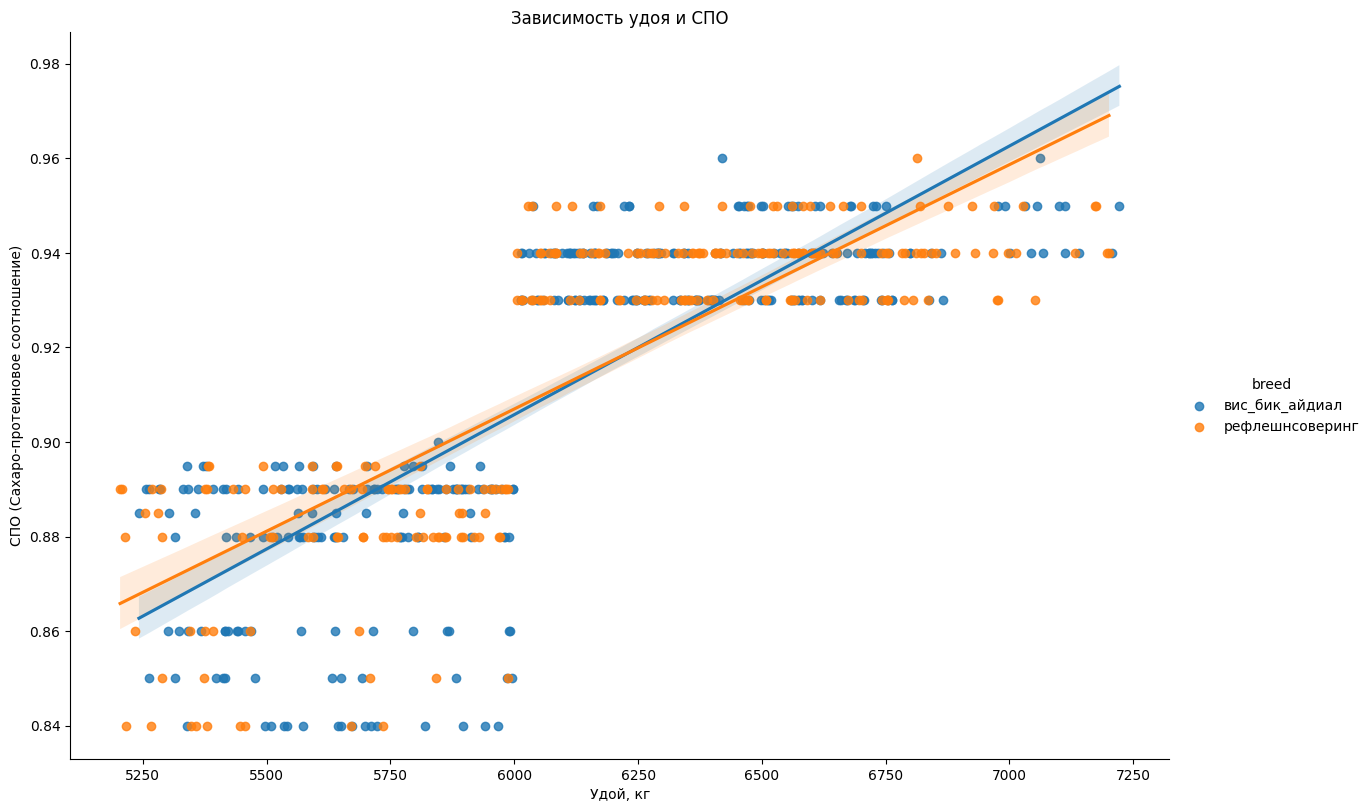

In [48]:
sns.lmplot(data=ferma, x='milk_kg', y='sugar_protein_ratio', hue='breed', height=8, aspect=1.5)
plt.title('Зависимость удоя и СПО')
plt.ylabel('СПО (Сахаро-протеиновое соотношение)')
plt.xlabel('Удой, кг');

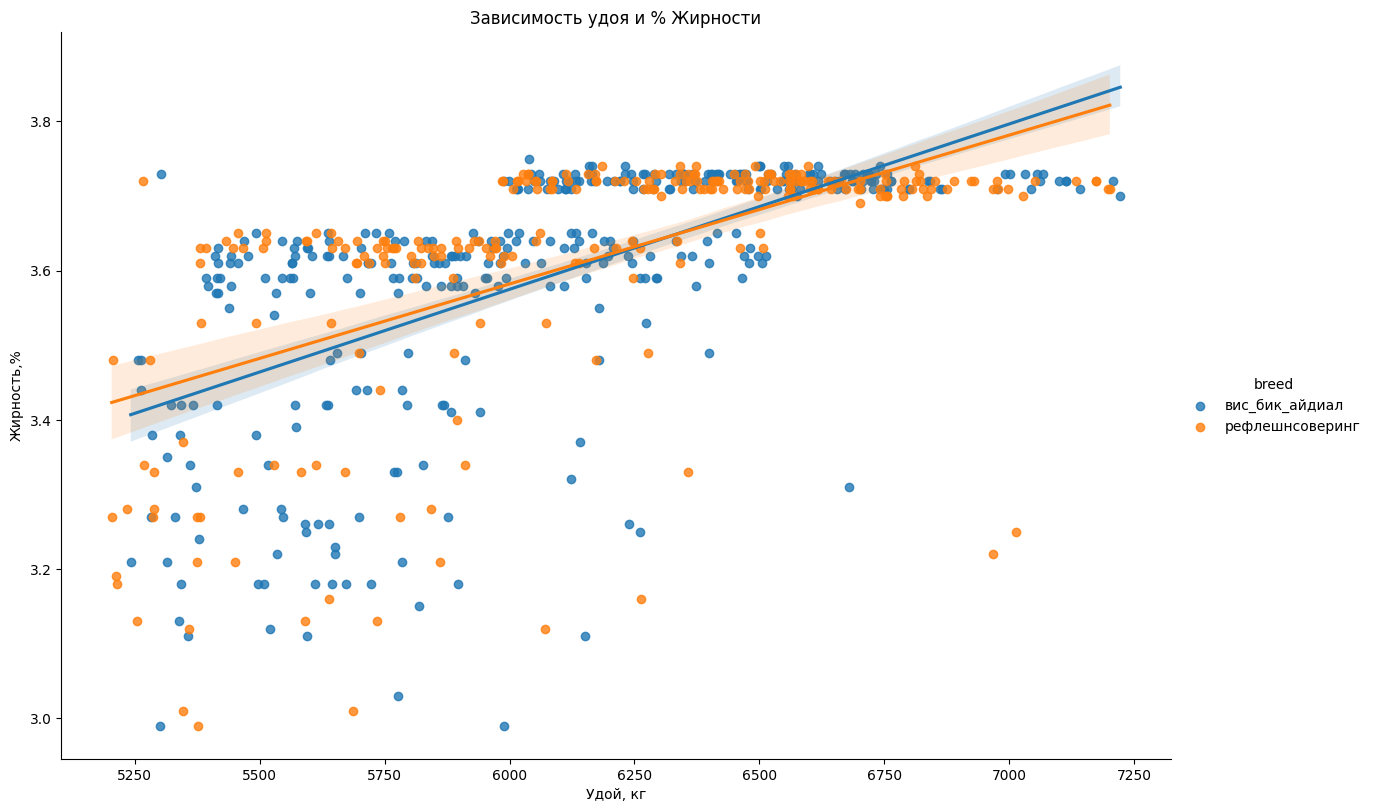

In [49]:
sns.lmplot(data=ferma, x='milk_kg', y='fat_pct', hue='breed', height=8, aspect=1.5)
plt.title('Зависимость удоя и % Жирности')
plt.ylabel('Жирность,%')
plt.xlabel('Удой, кг');

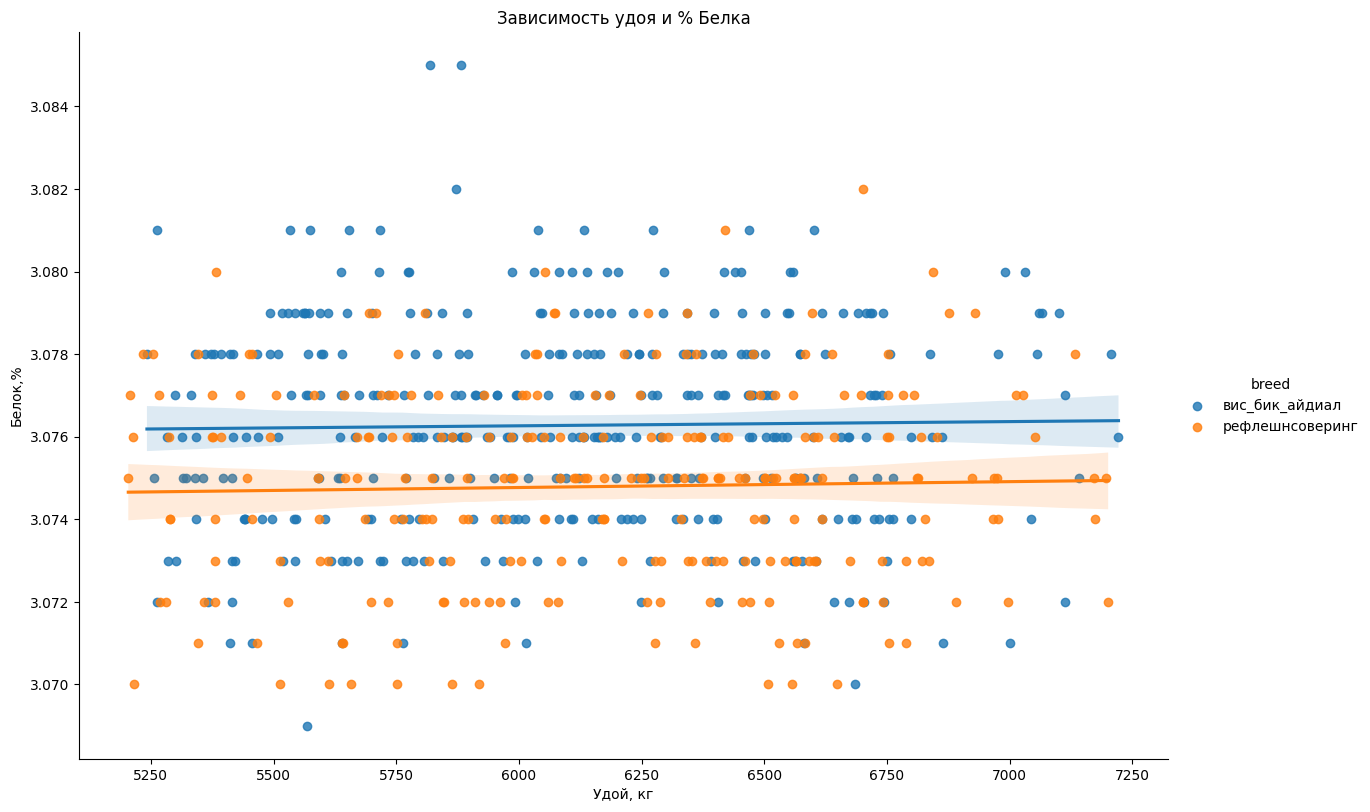

In [50]:
sns.lmplot(data=ferma, x='milk_kg', y='protein_pct', hue='breed', height=8, aspect=1.5)
plt.title('Зависимость удоя и % Белка')
plt.ylabel('Белок,%')
plt.xlabel('Удой, кг');

На 1 и 2 графике lmplot видна прямая линейная зависимость. Чем больше удой, тем выше как СПО, так и жирность. А вот у Белка нет никакой зависимости с удоем. Зато есть различия по породам - у породы Вис Бик Айдиал выше уровень белка, и при бОльшем количестве удоя выше СПО и жирность


**Вывод по разделу:**
- Построили матрицу корреляции. Удой сильно коррелирует с feed_unit и sugar_protein_ratio и age_int.
- Видим на графиках, что есть разница по породам коров и их итоговым характеристикам

<a id="линеар"></a>
## 5. Обучение модели линейной регрессии

**1 модель**

Для обучения модели линейной регрессии, где в качестве целевого признака будет Удой, кг(milk_kg) мы будем использовать всё, что связано с характеристиками коровы(breed, father_bull_breed, age) и условиями ее содержания (feed_unit, protein_g, sugar_protein_ratio, pasture_type). Эти 7 столбцов у нас будут входными признаками. Столбцы о качестве будующего молока нам не нужны

In [51]:
ferma_main

,id,milk_kg,feed_unit,protein_g,sugar_protein_ratio,breed,pasture_type,father_bull_breed,fat_pct,protein_pct,milk_taste,age
0,1,5863,14.2,1743,0.890,вис_бик_айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,вис_бик_айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не_вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не_вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,вис_бик_айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
623,625,6812,15.4,1964,0.940,рефлешнсоверинг,равнинное,айдиал,3.74,3.075,не_вкусно,более_2_лет
624,626,5513,12.9,1700,0.880,рефлешнсоверинг,равнинное,соверин,3.64,3.073,вкусно,менее_2_лет
625,627,5970,14.4,1837,0.880,рефлешнсоверинг,холмистое,соверин,3.64,3.075,не_вкусно,более_2_лет
626,628,5746,13.8,1994,0.890,рефлешнсоверинг,равнинное,соверин,3.64,3.077,вкусно,более_2_лет


In [52]:
num_col_names1 = ['feed_unit', 'protein_g', 'sugar_protein_ratio']
cat_col_names1 = ['breed', 'pasture_type', 'father_bull_breed', 'age']

X1 = ferma_main.drop(['milk_kg', 'id', 'fat_pct', 'protein_pct', 'milk_taste'], axis=1)
y1 = ferma_main['milk_kg']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state = RANDOM_STATE)

encoder1 = OneHotEncoder(handle_unknown = 'ignore', drop = 'first', sparse_output=False)

X_train_ohe1 = encoder1.fit_transform(X_train1[cat_col_names1])
X_test_ohe1 = encoder1.transform(X_test1[cat_col_names1])

encoder_col_names1 = encoder1.get_feature_names_out()

scaler1 = StandardScaler()

X_train_scaled1 = scaler1.fit_transform(X_train1[num_col_names1])
X_test_scaled1 = scaler1.transform(X_test1[num_col_names1])

X_train_ohe1 = pd.DataFrame(X_train_ohe1, columns = encoder_col_names1)
X_test_ohe1 = pd.DataFrame(X_test_ohe1, columns = encoder_col_names1)

X_train_scaled1 = pd.DataFrame(X_train_scaled1, columns = num_col_names1)
X_test_scaled1 = pd.DataFrame(X_test_scaled1, columns = num_col_names1)

X_train1 = pd.concat([X_train_ohe1, X_train_scaled1], axis=1) 
X_test1 = pd.concat([X_test_ohe1, X_test_scaled1], axis=1) 

model_lr1 = LinearRegression()
model_lr1.fit(X_train1, y_train1)
y_pred1 = model_lr1.predict(X_test1)

r2_1 = r2_score(y_test1, y_pred1)
r2_1

0.7844078173416966

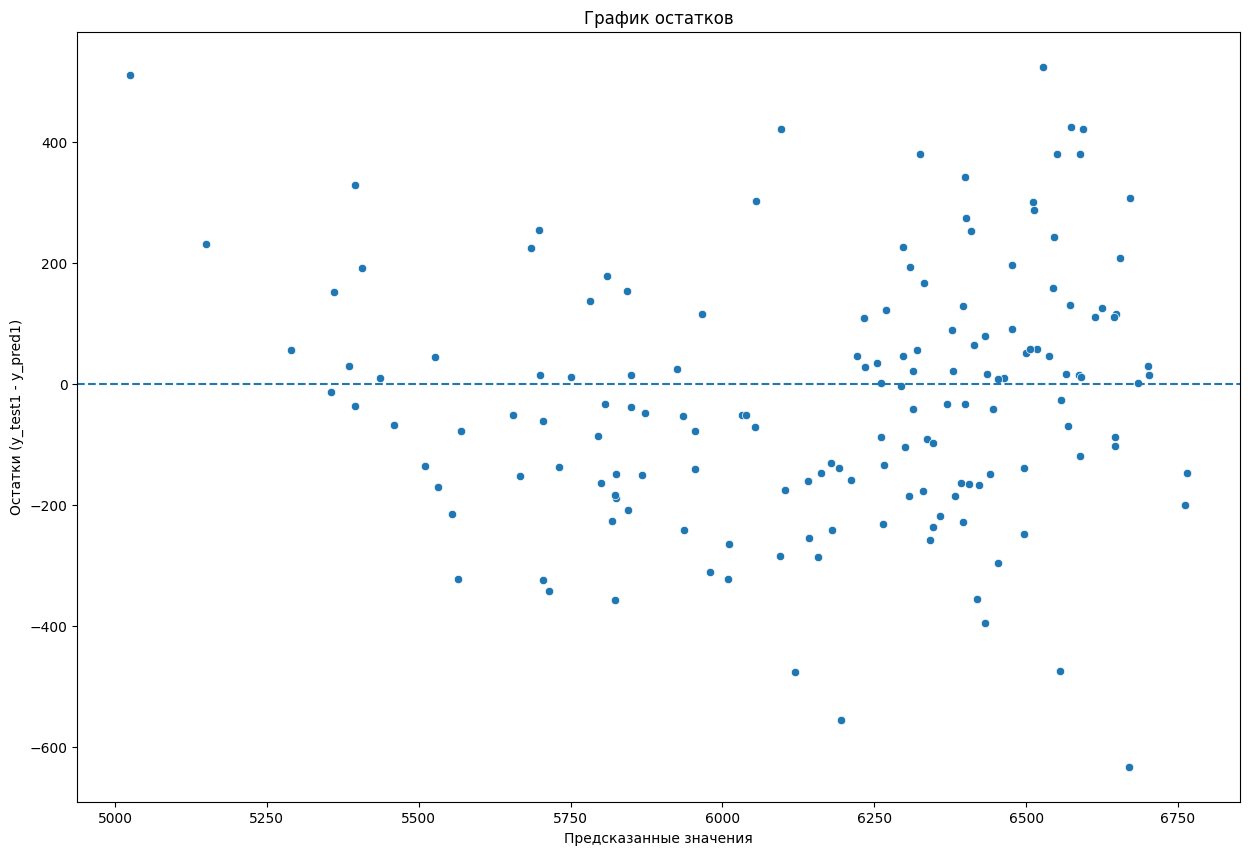

In [53]:
residuals1 = y_test1 - y_pred1

plt.figure(figsize=(15, 10))
sns.scatterplot(x=y_pred1, y=residuals1)
plt.axhline(linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки (y_test1 - y_pred1)")
plt.title("График остатков");

Коэффициент детерминации R2 получился 0,78. Модель права примерно в 78% случай, в 22% это ошибки. Разброс ошибок достигает в 500-600 кг

**2 модель**

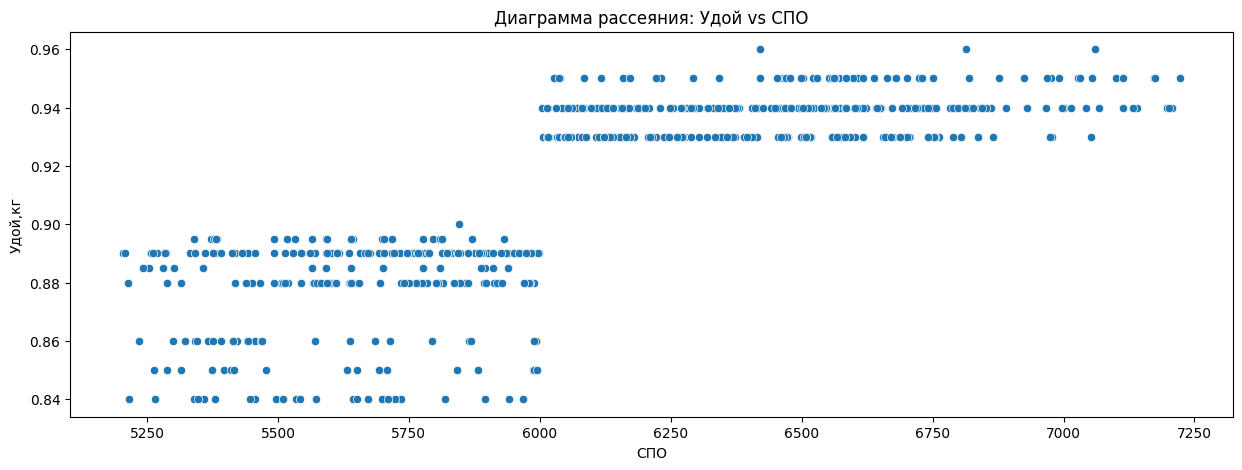

In [54]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=ferma[ferma['sugar_protein_ratio'] <20000], x='milk_kg', y='sugar_protein_ratio')
plt.title('Диаграмма рассеяния: Удой vs СПО')
plt.xlabel('СПО')
plt.ylabel('Удой,кг');

Для пограничного решения для СПО (sugar_protein_ratio') возьмем цифру 0.92. И возьведём в квадрат feed_unit (по условиям задачи)

In [55]:
X2 = X1.copy()
X2['sugar_protein_ratio'] = X2['sugar_protein_ratio'].apply(lambda x: 1 if x > 0.92 else 0)
X2['feed_unit'] = X2['feed_unit'] ** 2
X2.head()

,feed_unit,protein_g,sugar_protein_ratio,breed,pasture_type,father_bull_breed,age
0,201.64,1743,0,вис_бик_айдиал,равнинное,айдиал,более_2_лет
1,163.84,2138,0,вис_бик_айдиал,равнинное,соверин,менее_2_лет
2,196.00,1854,0,рефлешнсоверинг,холмистое,соверин,более_2_лет
3,153.76,2012,0,рефлешнсоверинг,холмистое,айдиал,более_2_лет
4,163.84,1675,0,вис_бик_айдиал,равнинное,соверин,менее_2_лет


In [56]:
num_col_names2 = ['feed_unit', 'protein_g']
cat_col_names2 = ['breed', 'pasture_type', 'father_bull_breed', 'age', 'sugar_protein_ratio']

y2 = ferma_main['milk_kg']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state = RANDOM_STATE)

encoder2 = OneHotEncoder(handle_unknown = 'ignore', drop = 'first', sparse_output=False)

X_train_ohe2 = encoder2.fit_transform(X_train2[cat_col_names2])
X_test_ohe2 = encoder2.transform(X_test2[cat_col_names2])

encoder_col_names2 = encoder2.get_feature_names_out()

scaler2 = StandardScaler()

X_train_scaled2 = scaler2.fit_transform(X_train2[num_col_names2])
X_test_scaled2 = scaler2.transform(X_test2[num_col_names2])

X_train_ohe2 = pd.DataFrame(X_train_ohe2, columns = encoder_col_names2)
X_test_ohe2 = pd.DataFrame(X_test_ohe2, columns = encoder_col_names2)

X_train_scaled2 = pd.DataFrame(X_train_scaled2, columns = num_col_names2)
X_test_scaled2 = pd.DataFrame(X_test_scaled2, columns = num_col_names2)

X_train2 = pd.concat([X_train_ohe2, X_train_scaled2], axis=1) 
X_test2 = pd.concat([X_test_ohe2, X_test_scaled2], axis=1) 

model_lr2 = LinearRegression()
model_lr2.fit(X_train2, y_train2)
y_pred2 = model_lr2.predict(X_test2)

r2_2 = r2_score(y_test2, y_pred2)
r2_2

0.8180879926867503

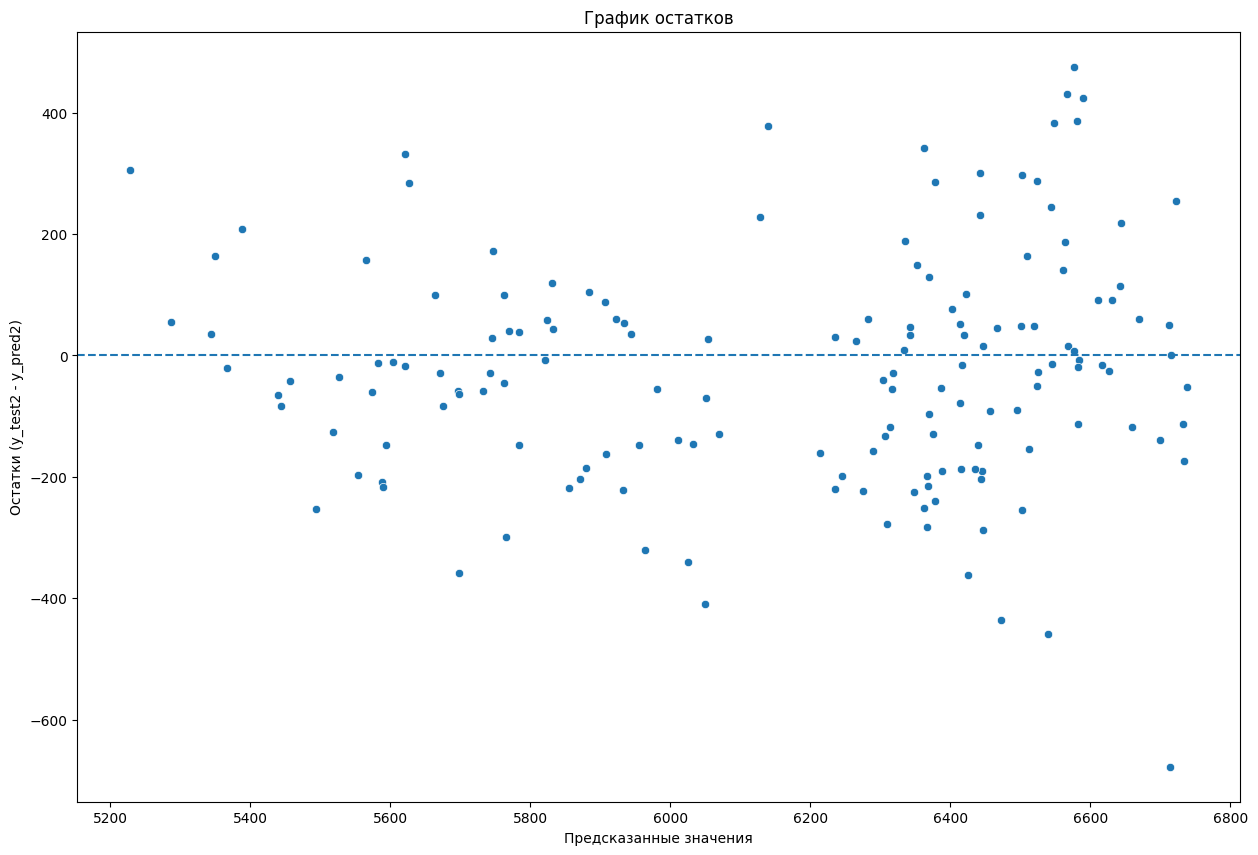

In [57]:
residuals2 = y_test2 - y_pred2

plt.figure(figsize=(15, 10))
sns.scatterplot(x=y_pred2, y=residuals2)
plt.axhline(linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки (y_test2 - y_pred2)")
plt.title("График остатков");

Тут уже коэффициент r2 равен 0.81 (81,80%). Это еще лучше

**3 модель**

Ранее мы уже присоединили таблицу ferma_dad к таблице ferma_main. Ее и будем использовать далее. Добавим сначала условия из прошлых моделей, оставим нужное

In [58]:
ferma3 = ferma.iloc[:, :13]
ferma3['sugar_protein_ratio'] = ferma3['sugar_protein_ratio'].apply(lambda x: 1 if x > 0.92 else 0)
ferma3['feed_unit'] = ferma3['feed_unit'] ** 2
ferma3

,id,milk_kg,feed_unit,protein_g,sugar_protein_ratio,breed,pasture_type,father_bull_breed,fat_pct,protein_pct,milk_taste,age,father_name
0,1,5863,201.64,1743,0,вис_бик_айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,буйный
1,2,5529,163.84,2138,0,вис_бик_айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,соловчик
2,3,5810,196.00,1854,0,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не_вкусно,более_2_лет,барин
3,4,5895,153.76,2012,0,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не_вкусно,более_2_лет,буйный
4,5,5302,163.84,1675,0,вис_бик_айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,барин
...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,625,6812,237.16,1964,1,рефлешнсоверинг,равнинное,айдиал,3.74,3.075,не_вкусно,более_2_лет,буйный
624,626,5513,166.41,1700,0,рефлешнсоверинг,равнинное,соверин,3.64,3.073,вкусно,менее_2_лет,барин
625,627,5970,207.36,1837,0,рефлешнсоверинг,холмистое,соверин,3.64,3.075,не_вкусно,более_2_лет,барин
626,628,5746,190.44,1994,0,рефлешнсоверинг,равнинное,соверин,3.64,3.077,вкусно,более_2_лет,барин


In [59]:
num_col_names3 = ['feed_unit', 'protein_g']
cat_col_names3 = ['breed', 'pasture_type', 'father_bull_breed', 'age', 'sugar_protein_ratio', 'father_name']

X3 = ferma3.drop(['milk_kg', 'id', 'fat_pct', 'protein_pct', 'milk_taste'], axis=1)
y3 = ferma3['milk_kg']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, random_state = RANDOM_STATE)

encoder3 = OneHotEncoder(handle_unknown = 'ignore', drop = 'first', sparse_output=False)

X_train_ohe3 = encoder3.fit_transform(X_train3[cat_col_names3])
X_test_ohe3 = encoder3.transform(X_test3[cat_col_names3])

encoder_col_names3 = encoder3.get_feature_names_out()

scaler3 = StandardScaler()

X_train_scaled3 = scaler3.fit_transform(X_train3[num_col_names3])
X_test_scaled3 = scaler3.transform(X_test3[num_col_names3])

X_train_ohe3 = pd.DataFrame(X_train_ohe3, columns = encoder_col_names3)
X_test_ohe3 = pd.DataFrame(X_test_ohe3, columns = encoder_col_names3)

X_train_scaled3 = pd.DataFrame(X_train_scaled3, columns = num_col_names3)
X_test_scaled3 = pd.DataFrame(X_test_scaled3, columns = num_col_names3)

X_train3 = pd.concat([X_train_ohe3, X_train_scaled3], axis=1) 
X_test3 = pd.concat([X_test_ohe3, X_test_scaled3], axis=1) 

model_lr3 = LinearRegression()
model_lr3.fit(X_train3, y_train3)
y_pred3 = model_lr3.predict(X_test3)

r2_3 = r2_score(y_test3, y_pred3)
r2_3

0.8247542745210406

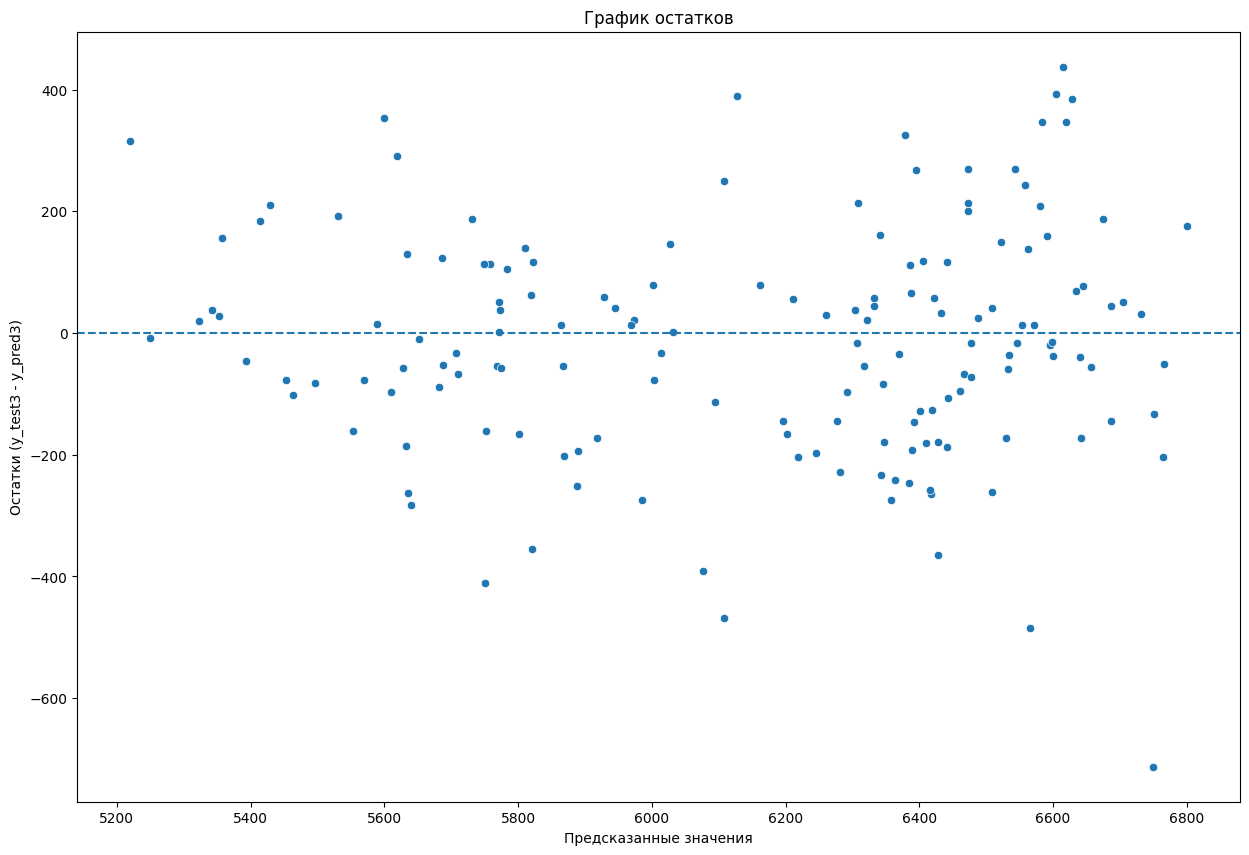

In [60]:
residuals3 = y_test3 - y_pred3

plt.figure(figsize=(15, 10))
sns.scatterplot(x=y_pred3, y=residuals3)
plt.axhline(linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки (y_test3 - y_pred3)")
plt.title("График остатков");

После добавления столбца Имя папы быка коэффициент детерминации стал еще выше, на 0.6 процента. Теперь он 82,47%. Модель всё лучше и лучше предсказывает данные

In [61]:
r2_gen = pd.DataFrame({'R2': [r2_1, r2_2, r2_3]}, index=['Первая модель', 'Вторая модель', 'Третья модель'])
r2_gen

,R2
Первая модель,0.784408
Вторая модель,0.818088
Третья модель,0.824754


Как мы видим, с каждым разом наша модель только улучшалась. Теперь сравним MSE, MAE, RMSE

In [62]:
def metrics(a,b):
    mae = round(mean_absolute_error(a, b),2)
    mse = round(mean_squared_error(a, b),2)
    rmse = round(np.sqrt(mse),2)
    return [mae, mse, rmse]

In [63]:
metrics = pd.DataFrame({'Первая модель' : metrics(y_test1, y_pred1), 
                        'Вторая модель' : metrics(y_test2, y_pred2), 
                        'Третья модель' : metrics(y_test3, y_pred3)}, index=['MAE', 'MSE', 'RMSE'] )
metrics

,Первая модель,Вторая модель,Третья модель
MAE,164.24,149.04,146.16
MSE,43887.02,37030.91,35673.89
RMSE,209.49,192.43,188.88


Чем ниже показатели, тем лучше. Тут тоже видно, как от модели к моделе всё лучше и лучше. Третья модель фаворит

Теперь рассчитаем доверительный интервал для третьей модели на тренировочных данных

In [64]:
train_errors3 = y_train3 - model_lr3.predict(X_train3)
train_errors3

507    -59.066788
382   -149.952019
586   -389.704047
196   -134.939224
327   -121.326386
          ...    
71     -76.122947
106    -38.989613
270     53.093191
435    -28.244452
102     -6.403271
Name: milk_kg, Length: 471, dtype: float64

95% доверительный интервал ошибки: [-355.99, 363.24]


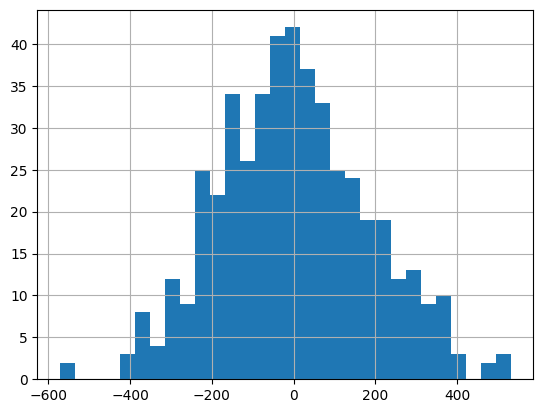

In [65]:
lower_quantile = round(np.quantile(train_errors3, 0.025),2)
upper_quantile = round(np.quantile(train_errors3, 0.975),2)

print('95% доверительный интервал ошибки:', [lower_quantile, upper_quantile])

train_errors3.hist(bins=30);

**С помощью лучшей модели спрогнозируйте удой коров, которых фермер хочет купить. Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки. Получите прогноз удоя коров.**

In [66]:
cow_buy.head()

,breed,pasture_type,father_bull_breed,father_name,fat_pct,protein_pct,age
0,вис_бик_айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет
1,вис_бик_айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет


In [67]:
ferma_main.head()

,id,milk_kg,feed_unit,protein_g,sugar_protein_ratio,breed,pasture_type,father_bull_breed,fat_pct,protein_pct,milk_taste,age
0,1,5863,14.2,1743,0.890,вис_бик_айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,вис_бик_айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не_вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не_вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,вис_бик_айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет


Так как мы будем использовать третью модель, то по условиям у нас feed_unit нужно возвести в квадрат. СПО сделать категориальным признаком. Помним, что граница у нас была на 0.92. И выполняем условия задачи 

In [68]:
cow_ferma = cow_buy.copy()

cow_ferma['feed_unit'] = (ferma_main['feed_unit'].mean() * 1.05) **2
cow_ferma['protein_g'] = ferma_main['protein_g'].mean() * 1.05
cow_ferma['sugar_protein_ratio'] = ferma_main['sugar_protein_ratio'].mean() * 1.05
cow_ferma['sugar_protein_ratio'] = cow_ferma['sugar_protein_ratio'].apply(lambda x:1 if x > 0.92 else 0)
cow_ferma.head()

,breed,pasture_type,father_bull_breed,father_name,fat_pct,protein_pct,age,feed_unit,protein_g,sugar_protein_ratio
0,вис_бик_айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,233.361138,2019.947532,1
1,вис_бик_айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,233.361138,2019.947532,1
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,233.361138,2019.947532,1
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,233.361138,2019.947532,1
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,233.361138,2019.947532,1


In [69]:
num_col_names4 = ['feed_unit', 'protein_g']
cat_col_names4 = ['breed', 'pasture_type', 'father_bull_breed', 'age', 'sugar_protein_ratio', 'father_name']

X4 = cow_ferma.drop(['fat_pct', 'protein_pct'], axis=1)

X_buy_ohe4 = encoder3.transform(cow_ferma[cat_col_names4])
X_buy_scaled4 = scaler3.transform(cow_ferma[num_col_names4])
encoder_col_names4 = encoder3.get_feature_names_out()

X_buy_ohe4 = pd.DataFrame(X_buy_ohe4, columns = encoder_col_names4)
X_buy_scaled4 = pd.DataFrame(X_buy_scaled4, columns = num_col_names4)

X_buy = pd.concat([X_buy_ohe4, X_buy_scaled4], axis=1)

y_pred4 = model_lr3.predict(X_buy)
cow_ferma['прогноз'] = y_pred4.astype('int')
cow_ferma

,breed,pasture_type,father_bull_breed,father_name,fat_pct,protein_pct,age,feed_unit,protein_g,sugar_protein_ratio,прогноз
0,вис_бик_айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,233.361138,2019.947532,1,6609
1,вис_бик_айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,233.361138,2019.947532,1,6378
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,233.361138,2019.947532,1,6283
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,233.361138,2019.947532,1,6593
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,233.361138,2019.947532,1,6542
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,233.361138,2019.947532,1,6425
6,вис_бик_айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,233.361138,2019.947532,1,6609
7,вис_бик_айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,233.361138,2019.947532,1,6571
8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,233.361138,2019.947532,1,6283
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,233.361138,2019.947532,1,6400


**Вывод по разделу:**
- Проверили три модели машинного обучения, сопоставили значения r2, rmse, mse и mae
- Так как третья модель показала себя лУчшей из всех, то на ней и спрогнозировали удой коров. Все коровы по прогнозу дадут более 6000 кг в год

<a id="логистик"></a>
## 6. Обучение модели логистической регрессии

In [70]:
ferma_milk = ferma_main.copy()
ferma_milk = ferma_milk.merge(ferma_dad, on = 'id')
ferma_milk['father_name'] = ferma_milk['father_name'].str.lower()
ferma_milk['milk_taste'] = ferma_milk['milk_taste'].apply(lambda x:1 if x == 'вкусно' else 0)
ferma_milk

,id,milk_kg,feed_unit,protein_g,sugar_protein_ratio,breed,pasture_type,father_bull_breed,fat_pct,protein_pct,milk_taste,age,father_name
0,1,5863,14.2,1743,0.890,вис_бик_айдиал,равнинное,айдиал,3.58,3.076,1,более_2_лет,буйный
1,2,5529,12.8,2138,0.890,вис_бик_айдиал,равнинное,соверин,3.54,3.079,1,менее_2_лет,соловчик
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,0,более_2_лет,барин
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,0,более_2_лет,буйный
4,5,5302,12.8,1675,0.885,вис_бик_айдиал,равнинное,соверин,3.73,3.073,1,менее_2_лет,барин
...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,625,6812,15.4,1964,0.940,рефлешнсоверинг,равнинное,айдиал,3.74,3.075,0,более_2_лет,буйный
624,626,5513,12.9,1700,0.880,рефлешнсоверинг,равнинное,соверин,3.64,3.073,1,менее_2_лет,барин
625,627,5970,14.4,1837,0.880,рефлешнсоверинг,холмистое,соверин,3.64,3.075,0,более_2_лет,барин
626,628,5746,13.8,1994,0.890,рефлешнсоверинг,равнинное,соверин,3.64,3.077,1,более_2_лет,барин


In [71]:
num_col_names5 = ['feed_unit', 'protein_g', 'fat_pct', 'protein_pct', 'sugar_protein_ratio']
cat_col_names5 = ['breed', 'pasture_type', 'father_bull_breed', 'age', 'father_name']

X5 = ferma_milk.drop(['id', 'milk_taste', 'milk_kg'], axis=1)
y5 = ferma_milk['milk_taste']

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, random_state = RANDOM_STATE)

encoder5 = OneHotEncoder(handle_unknown = 'ignore', drop = 'first', sparse_output=False)

X_train_ohe5 = encoder5.fit_transform(X_train5[cat_col_names5])
X_test_ohe5 = encoder5.transform(X_test5[cat_col_names5])

encoder_col_names5 = encoder5.get_feature_names_out()

scaler5 = StandardScaler()

X_train_scaled5 = scaler5.fit_transform(X_train5[num_col_names5])
X_test_scaled5 = scaler5.transform(X_test5[num_col_names5])

X_train_ohe5 = pd.DataFrame(X_train_ohe5, columns = encoder_col_names5)
X_test_ohe5 = pd.DataFrame(X_test_ohe5, columns = encoder_col_names5)

X_train_scaled5 = pd.DataFrame(X_train_scaled5, columns = num_col_names5)
X_test_scaled5 = pd.DataFrame(X_test_scaled5, columns = num_col_names5)

X_train5 = pd.concat([X_train_ohe5, X_train_scaled5], axis=1) 
X_test5 = pd.concat([X_test_ohe5, X_test_scaled5], axis=1) 

clf = LogisticRegression()
clf.fit(X_train5, y_train5)
predictions5 = clf.predict(X_test5)
y_proba5 = clf.predict_proba(X_test5)[:,1]

acc = accuracy_score(y_test5, predictions5)
recall = recall_score(y_test5, predictions5)
precision = precision_score(y_test5, predictions5)

print(f'Accurracy: {acc:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')

Accurracy: 0.61
Recall: 0.85
Precision: 0.61


Модель в целом предсказала правильно 61% данных. Это довольно слабо
Среди всего вкусного молока модель правильно нашла только 85% - (False Negative)
Из всего молока, которе модель назвала вкусным, только 61% было действительно вкусным (False Positive)

Фермеру важней, чтобы отсутствовала ошибка реального невкусного молока. Поэтому нам важно, чтобы Precision был равен 1. То есть фермера важней исключить ошибку первого рода

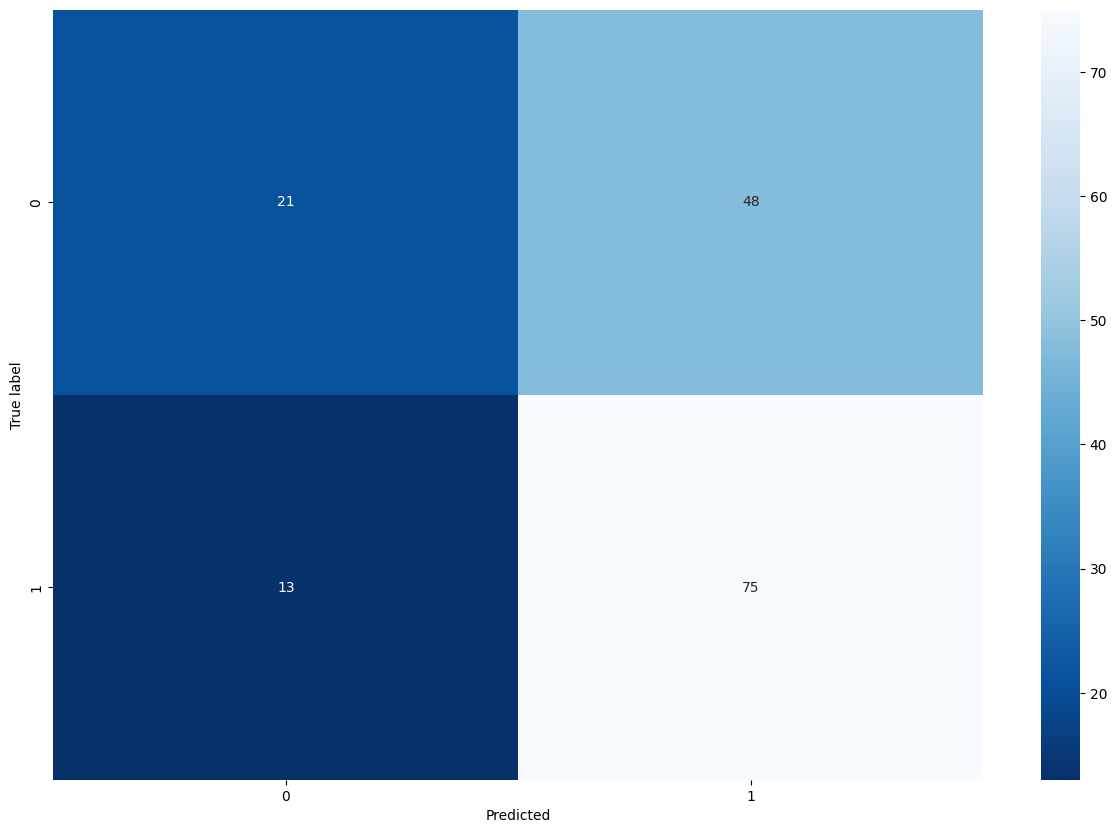

In [72]:
cm = confusion_matrix(y_test5, predictions5)
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

Ошибок первого рода (False Positive) - 48 случаев. Второго рода (False Negative) - 13 случаев

Теперь найдем такое пороговое значение y_proba, при котором волоко точно будет вкусным (Precision = 1)

In [73]:
data_milk = pd.DataFrame(zip(y_test5, y_proba5), 
                         columns = ['y_valid', 'y_proba']).sort_values(by = 'y_proba', ascending=False)
data_milk.head()

,y_valid,y_proba
85,1,0.843531
17,1,0.817904
110,1,0.816091
66,1,0.809889
116,0,0.808774


In [74]:
thresholds = [round(i,2) for i in np.arange(0,1,0.01, dtype=float)]
columns = []
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data_milk['y_pred_'+str(i)] = data_milk['y_proba'].apply(lambda x: 1 if  x> i else 0)
data_milk.head()

C:\Users\Roman\AppData\Local\Temp\ipykernel_2400\938698380.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_milk['y_pred_'+str(i)] = data_milk['y_proba'].apply(lambda x: 1 if  x> i else 0)
C:\Users\Roman\AppData\Local\Temp\ipykernel_2400\938698380.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_milk['y_pred_'+str(i)] = data_milk['y_proba'].apply(lambda x: 1 if  x> i else 0)


,y_valid,y_proba,y_pred_0.0,y_pred_0.01,y_pred_0.02,y_pred_0.03,y_pred_0.04,y_pred_0.05,y_pred_0.06,y_pred_0.07,...,y_pred_0.9,y_pred_0.91,y_pred_0.92,y_pred_0.93,y_pred_0.94,y_pred_0.95,y_pred_0.96,y_pred_0.97,y_pred_0.98,y_pred_0.99
85,1,0.843531,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
17,1,0.817904,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
110,1,0.816091,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
66,1,0.809889,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
116,0,0.808774,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [75]:
for i in data_milk.columns[2:]:
    if precision_score( data_milk.y_valid, data_milk[i]) == 1: 
        print(f'при пороге {i}: ')
        print(f'recall:   {recall_score( data_milk.y_valid, data_milk[i])}')
        print(f'precision:   {precision_score( data_milk.y_valid, data_milk[i])}')
        break

при пороге y_pred_0.81: 
recall:   0.03409090909090909
precision:   1.0


In [85]:
data_milk = data_milk.copy()
data_milk['y_proba1'] = data_milk['y_proba'].apply(lambda x: 1 if x >= 0.81 else 0)
data_milk

Прогноз. Преобразуем табличку cow_buy согласно условиям и данным, которые были у нас на тренировочной выборке

In [78]:
cow_ferma['feed_unit'] = ferma_main['feed_unit'].mean() * 1.05
cow_ferma['protein_g'] = ferma_main['protein_g'].mean() * 1.05
cow_ferma['sugar_protein_ratio'] = ferma_main['sugar_protein_ratio'].mean() * 1.05
cow_ferma.head()

,breed,pasture_type,father_bull_breed,father_name,fat_pct,protein_pct,age,feed_unit,protein_g,sugar_protein_ratio,прогноз
0,вис_бик_айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,6609
1,вис_бик_айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,6378
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,6283
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,6593
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,6542


In [81]:
num_col_names6 = ['feed_unit', 'protein_g', 'fat_pct', 'protein_pct', 'sugar_protein_ratio']
cat_col_names6 = ['breed', 'pasture_type', 'father_bull_breed', 'age', 'father_name']

X_buy_ohe6 = encoder5.transform(cow_ferma[cat_col_names6])
X_buy_scaled6 = scaler5.transform(cow_ferma[num_col_names6])
encoder_col_names6 = encoder5.get_feature_names_out()

X_buy_ohe6 = pd.DataFrame(X_buy_ohe6, columns = encoder_col_names6)
X_buy_scaled6 = pd.DataFrame(X_buy_scaled6, columns = num_col_names6)

X_buy_milk = pd.concat([X_buy_ohe6, X_buy_scaled6], axis=1)

predictions6 = clf.predict(X_buy_milk)
y_proba6 = clf.predict_proba(X_buy_milk)[:,1]

cow_ferma['% вкуса молока'] = clf.predict_proba(X_buy_milk)[:,1]
cow_ferma['вкус молока'] = cow_ferma['% вкуса молока'].apply(lambda x:'вкусно' if x > 0.81 else 'не_вкусно')
cow_ferma

,breed,pasture_type,father_bull_breed,father_name,fat_pct,protein_pct,age,feed_unit,protein_g,sugar_protein_ratio,прогноз,% вкуса молока,вкус молока
0,вис_бик_айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,6609,0.767591,не_вкусно
1,вис_бик_айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,6378,0.753957,не_вкусно
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,6283,0.692242,не_вкусно
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,6593,0.479079,не_вкусно
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,6542,0.610578,не_вкусно
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,15.276162,2019.947532,0.958744,6425,0.180603,не_вкусно
6,вис_бик_айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,6609,0.767591,не_вкусно
7,вис_бик_айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,0.958744,6571,0.735407,не_вкусно
8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,6283,0.692242,не_вкусно
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,0.958744,6400,0.817493,вкусно


По итогу у нас получилось всего одна корова, у которых будет вкусное молоко - под индексом 9

<a id="вывод"></a>
## 7. Выводы

Для фермера нам нужно отобрать коров, у которых прогноз Удоя будет более 6000 кг в год и вкусное молоко. Коровы должны попадать в рассчитанный нами ранее доверительный интервал. 

In [82]:
lower_quantile

-355.99

In [83]:
low_cow = 6000 +lower_quantile

cow_fermer = cow_ferma.query('прогноз > @low_cow and `вкус молока` == "вкусно"')
cow_fermer

,breed,pasture_type,father_bull_breed,father_name,fat_pct,protein_pct,age,feed_unit,protein_g,sugar_protein_ratio,прогноз,% вкуса молока,вкус молока
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.4,3.079,менее_2_лет,15.276162,2019.947532,0.958744,6400,0.817493,вкусно


Вот список коров, которые точно попадают под нашу задачу. У которых удой выше 6000кг в среднем за год и у которых вкусное молоко с очень высокой долей вероятности

In [86]:
cow_ferma['% вкуса молока'].sort_values(ascending=False).head(5)

9     0.817493
13    0.800143
0     0.767591
6     0.767591
16    0.767478
Name: % вкуса молока, dtype: float64

Так же мы можем посмотреть на коров, которые можно купить с минимальным рисков - в столбце "% вкуса молока" которые ближе всего к 0.81. Это коровые с индексом 13, 0, 6 и 16. С очень маленькой вероятность может случиться у них ошибка первого рода - когда модель предсказала вкусное молоко, а оно оказалось не вкусное

По результатам линейной модели можем сказать, что все коровы дадут нужное количество молока в год, качество модели с каждым новым вводимым параметром увеличивается. От 78% до 82%. Качество же логистической регрессии всего 61%, это довольно мало для точных прогнозов.

**Итоговый вывод по проделанной работе:**

1) Было загружено 3 датасета. 2 датасета, связанные с коровами фермера. Их параметры, качество молока, родовая. Третий - данные о коровах "ЭкоФермы", которых фермер хочет купить.
2) Были изучены 3 датасета, переименованы колонки. Изменены данные в строках в удобный и читаемый вид. Удалены ненужные явные дубликаты. Изменили неявные дубликаты. Также изменили, где нужно, тип данных. В датасет добавили дополнительные столбцы с булевыми значениями для признаков с двумя уникальными значениями. Была удалено одна строка с аномальным значением mlk_kg, она бы сильно мешала нам с МО.
3) Провели исследовательский анализ данных коров фермера. Изучили графики распределения числовых и категориальных признаков. В среднем удой коров выше 6100 кг в год. Остальные числовые значения либо без выбросов, либо с выбросами, которые исключить никак нельзя самих этих значение не так много. У категориальных признаков можно заменить некоторые закономерности (к примеру, что коров младше 2 лет почти никогда не дают удой выше 6000 кг).
4) Провели корреляционный анализ между всеми признаками. Milk_kg имеет примерно с половиной признаков линейную связь. С половиной же почти никак не коррелирует. Так же мы посмотрели входные признаки на предмет мультиколлинеарности, но таковых не нашли.
5) Обучили три модели линейной регрессии, постепенно добавляя в каждую из них по дополнительному параметру. С каждым новым разом точность модели увеличивалась, и для дальнейшего прогноза Удоя выбрали третью модель с точность 82%
6) С помощью третьей модели спрогнозировали удой коров, которых фермер хочет купить. Все коровы подошли ферверу по удою (более 6000 кг в год)
7) При помощи логистической регрессии обучили модель по прогнозу молока. Нам важно исключить ошибку первого рода, поэтому нашли тот порог, когда ошибок первого рода нет вовсе. Это 81%. Всё что больше 0.81 - вкусное молоко. Ниже - не вкусное.
8) Спрогнозировали вкус молока коров, которых фермер собирается купить. И в результате прогноза таких коров всего одна. И 4 коровы, которые очень близки к вкусному молоку. Эти данные и отправляются фермеру на стол!